
<p style='text-align: left;'><span style="color: #0D0D0D; font-family: Segoe UI; font-size: 2.4em; font-weight: 300;">THE TITANIC WRECKAGE MAY COMPLETELY VANISH BY 2030
BUT, LET US ALL KEEP THE LEGACY ALIVE</span></p>


![](https://i.pinimg.com/originals/a4/08/ef/a408efc7cea165569dbd57826278fc8d.jpg)


<span style="color: #221E1F; font-family: Trebuchet MS; font-size: 2.2em;">Contents</span>


* [1. Introduction](#introduction)
* [2. Environment Preparation](#envprep)
* [3. A bit of Exploratory Data Analysis](#eda)
    - [3.1 Analysis of Age](#aoa)
    - [3.2 Exploration of Fare ](#fare)
    - [3.4 Analysis of Pclass & Sex](#pclasssex)
    - [3.5 Analysis of SibSp & Panrh](#sibpar)
    - [3.6 Few more plots of Feature densities](#density)
    - [3.7 Exploration of Feature Relationships](#rel)
* [4. Feature Engineering & EDA Extended](#fe)
    - [4.1 Encoding of Sex](#ensex)
    - [4.2 Let's Analyze & Feature Engineer Name](#name)
        - [4.2.1 Derive & Plot the Title Feature](#name)
        - [4.2.2 Extract Name Length Feature from Name](#length)
    - [4.3 One-hot Encode Embarked & Label Encode Title](#oneone)
    - [4.4 Derive Family Size Feature](#feparsib)
    - [4.5 Label Encoding of Family Size](#encfam)
    - [4.6 Extract Family_Name Feature from Name](#famname)
    - [4.7 Derive Friends & Family Survival Rate Feature](#famsurv)
* [5. Data Cleaning & More Feature Engineering](#morefe)
    - [5.1 Cleaning & Encoding of the Cabin](#morefe)
    - [5.2 Cleaning the Ticket](#cltik)
    - [5.3 Derive the Ticket Frequency](#ticfea)
    - [5.4 One-hot Encoding Ticket](#onetick)
    - [5.5 Fare into Categorical Bins ](#farecat)
    - [5.6 Additional Derived Features from Feature Relationships](#der)
    - [5.7 Imputation of Missing Age Values](#mis)
    - [5.8 Obtain Features for Children & Seniors](#chilsen)
    - [5.9 Exploration of Derived Features](#eder)
    - [5.10 Pickle & Store Dataframes for Later](#pik)
    - [5.11 Standard Scaling Data](#sca)
    - [5.12 Select Features for Training](#sel)
* [6. Checking Feature Importance by Correlation Analysis](#corr)
* [7. Preparation of Train & Test Data](#trte)
* [8. Model Development](#mdev)
    - [8.1 Model Architecture Definition](#mbul)
    - [8.2 Setting Cross-validation Scheme & Model Training](#cross)
    - [8.3 Plot the Model Metric Trends](#mloss)
* [9. Submission File Generation	](#subfil)

<a id="introduction"></a>
# 1. Introduction

**The reason for using a Multi-layer Perceptron or a Feed-forward Neural network was to exploit and showcase its amazing potential and capabilities if it is tuned just right with sufficient regularization.**

Througout the notebook, I have detailed out the Exploratory Data Analysis and the Feature Engineering that was carried out to best bring out the capabilities of MLPs.

Tuning a Neural Network with just the right amount of regularization and giving the right features to obtain an optimal low variance and bias to maximize the accuracy is a very complex and time-consuming task especially given the limited samples and nature of the dataset.

However, I admit that investing time tuning an XGboost, KKN or other ensemble models is much more worthwhile in time-bound situations and Neural Networks may not be the best choice but, proper application of techniques with good feature engineering and driving the Model to a good local minimum with a lot of regularization yielded a great performance.

**I tried Neural Network Ensembling, Mean Encoding, Grid Search, Bayesian Optimization and several other approaches to improve the model and find the best Hyperparameters at times but, the lack of options to find a representative cross-validation scheme which mimics the Public leaderboard split to represent some sort of dependancy in the model metrics was a difficult task.**

**Finally, I ended up babysitting the model with manual tuning techniques to intuitively find the best hyperparameters and a single model tuned and regularized well was capable of representing the non-linear decision boundaries of the data and give the best performance.**

<span style="color: #056e94; font-family: Trebuchet MS; font-size: 1.3em;">I will keep updating this notebook with further details of the implementation. Thanks to the Kaggle commmunity and staff for all the support.</span>

<span style="color: #056e94; font-family: Trebuchet MS; font-size: 1.3em;">Please upvote and comment if you like my work :)</span>



[![Ask Me Anything !](https://img.shields.io/badge/Ask%20me-anything-1abc9c.svg?style=flat-square&logo=kaggle)](https://www.kaggle.com/sreevishnudamodaran)




![TPU!](https://img.shields.io/badge/Accelerator-GPU-orange?style=flat-square&logo=kaggle)

![Upvote!](https://img.shields.io/badge/Upvote-If%20you%20like%20my%20work-07b3c8?style=for-the-badge&logo=kaggle)



#### Details & Description of Features:

* PassengerID
* Survived - (0 = No, 1 = Yes)
* Pclass - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name
* Sex
* Age
* SibSp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare in British pound
* Cabin - Cabin Number
* Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
<br />
<br />

#### Additional Notes:
* Pclassis a proxy for socio-economic status (SES) : 1st ~ Upper, 2nd ~ Middle, 3rd ~ Lower
* Fare is in Pre-1970 British Pounds : Conversion Factors:  £1 = 12s (shillings) = 240d (pence) and 1s = 20d 
* Sibling : Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse : Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent : Mother or Father of Passenger Aboard Titanic
* Child : Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic



<a id="envprep"></a>
# 2. Environment Preparation
### Updating Seaborn to the Version 0.11.0


In [1]:
!pip install seaborn==0.11.0

     |████████████████████████████████| 283 kB 4.4 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### Library Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.ticker as ticker
print(sns.__version__)

from matplotlib import rcParams
sns.set(rc={"font.size":18,"axes.titlesize":30,"axes.labelsize":18,
            "axes.titlepad":22, "axes.labelpad":18, "legend.fontsize":15,
            "legend.title_fontsize":15, "figure.titlesize":35})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs.layout import Scene

0.11.1


In [2]:
#Load Train and Test Data
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data//test.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="eda"></a>
# 3. A bit of Exploratory Data Analysis
### Converting Appropriate Columns to Categorical Type

In [3]:
for col in ['Sex', 'Cabin', 'Ticket', 'Embarked']:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(5), object(1)
memory usage: 88.0+ KB


<a id="aoa"></a>
## 3.1 Analysis of Age

We see that survival rate is is different for passengers below age 9 and above age 74. We will use these limits later to categorize and derive new features.

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


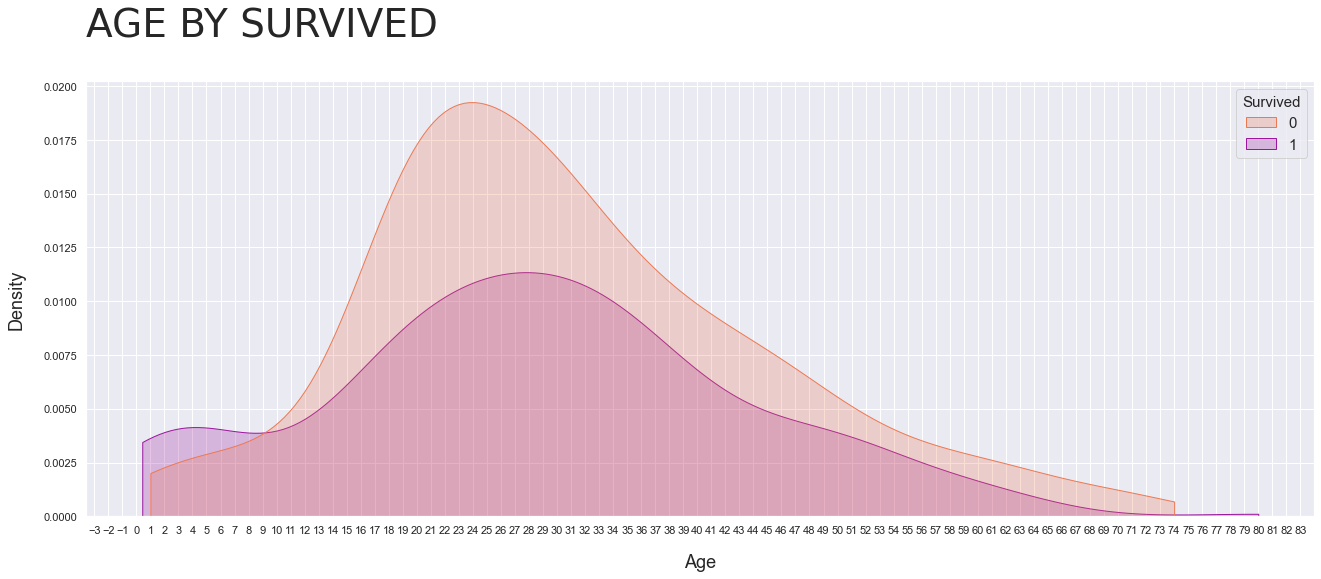

In [4]:
fig = plt.figure(figsize=(22,8))
kde = sns.kdeplot(x="Age", data=df_train, cut=0, hue="Survived",
                  fill=True, legend=True, palette="plasma_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("AGE BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=39);


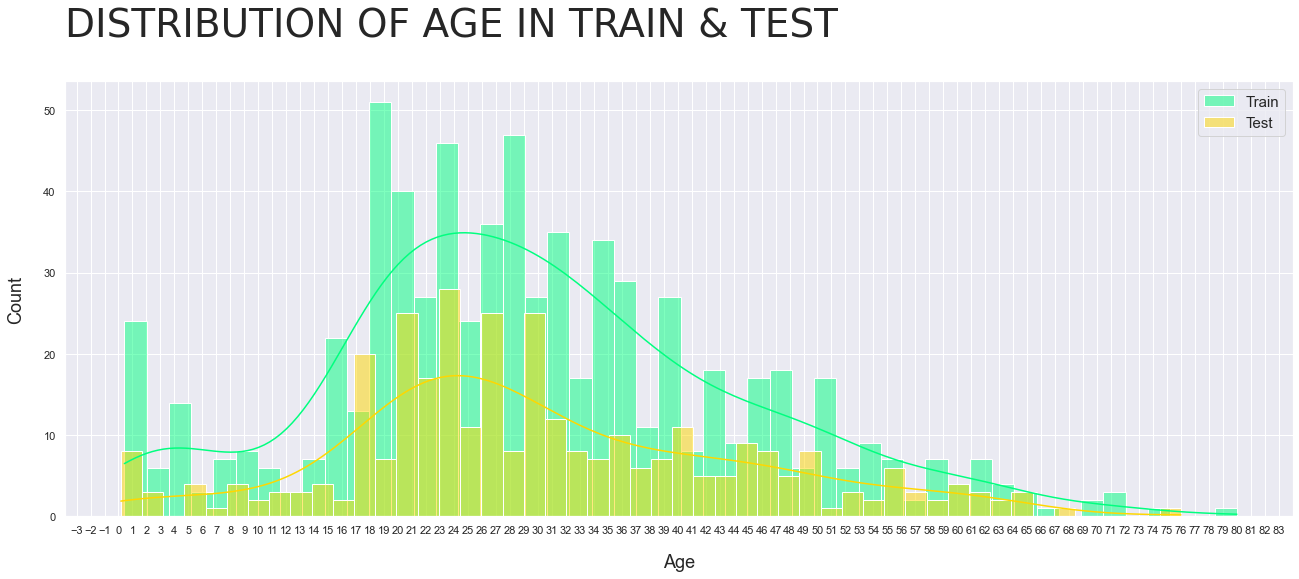

In [5]:
fig = plt.figure(figsize=(22,8))
hist = sns.histplot(df_train['Age'], color="springgreen", kde=True, bins=50, label='Train')
hist = sns.histplot(df_test['Age'], color="gold", kde=True, bins=50, label='Test')

title = fig.suptitle("DISTRIBUTION OF AGE IN TRAIN & TEST", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=39)

hist.xaxis.set_major_locator(ticker.MultipleLocator(1))
hist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

<a id="fare"></a>
## 3.2 Exploration of Fare


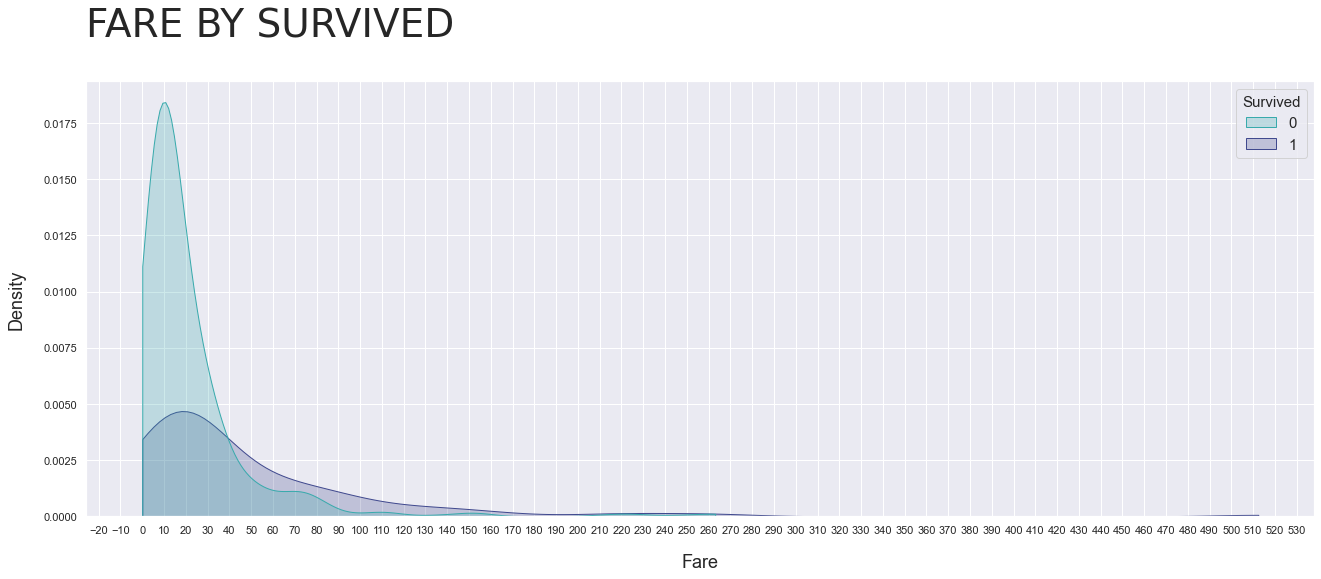

In [6]:
fig = plt.figure(figsize=(22,8))
kde = sns.kdeplot(x="Fare", data=df_train, cut=0, hue="Survived", fill=True, legend=True, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(10))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("FARE BY SURVIVED", x=0.125, y=1.01
            , ha='left',fontweight=100, fontfamily='Lato', size=39);


Behaviour of fare seems different before and after the value 39

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


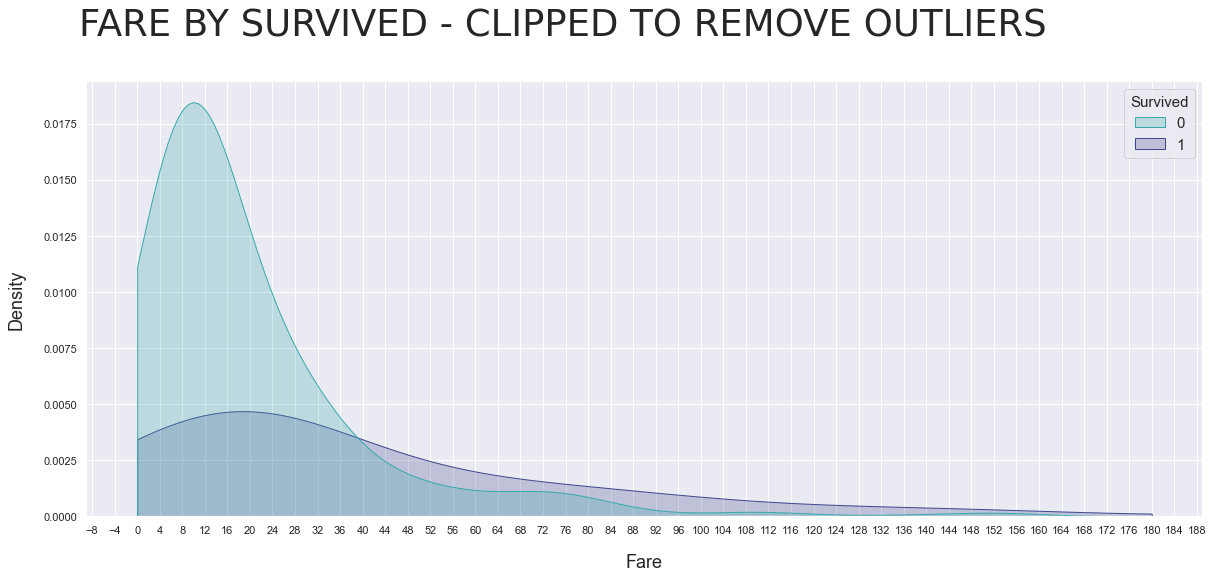

In [7]:
fig = plt.figure(figsize=(20,8))
kde = sns.kdeplot(x="Fare", data=df_train, cut=0, clip=[0,180], hue="Survived", fill=True, legend=True, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(4))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("FARE BY SURVIVED - CLIPPED TO REMOVE OUTLIERS", x=0.12, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=37);


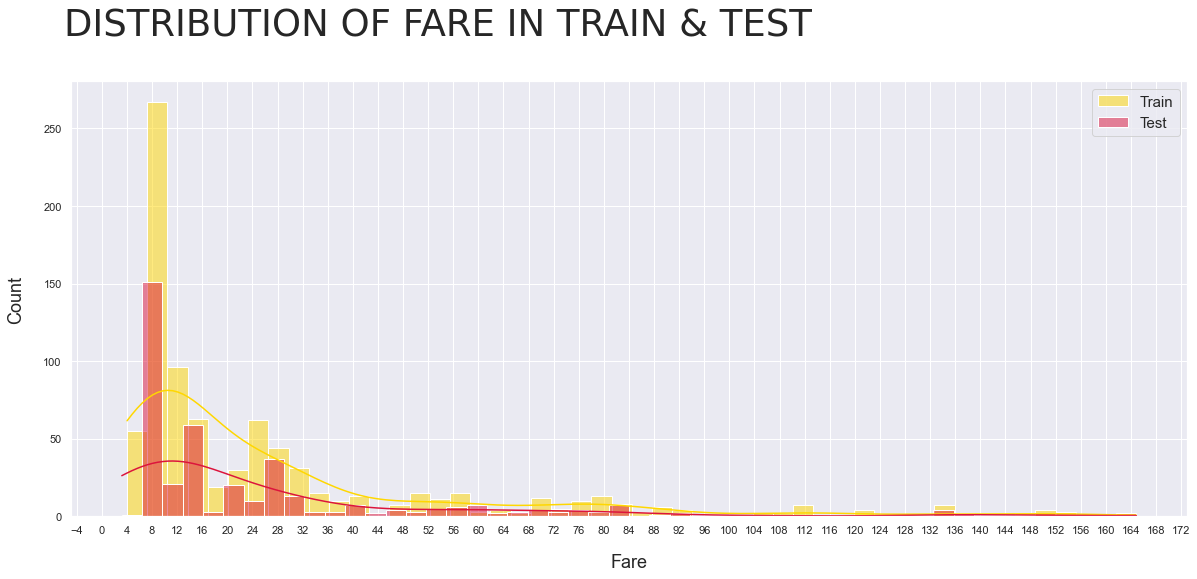

In [8]:
fig = plt.figure(figsize=(20,8))
dist = sns.histplot(df_train[(df_train.Fare > 0) & (df_train.Fare <=180)]['Fare'],
                    color="gold", kde=True, bins=50, label='Train')
dist = sns.histplot(df_test[(df_test.Fare > 0) & (df_test.Fare <=180)]['Fare'],
                    color="crimson", kde=True, bins=50, label='Test')

title = fig.suptitle("DISTRIBUTION OF FARE IN TRAIN & TEST", x=0.12, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=37)

dist.xaxis.set_major_locator(ticker.MultipleLocator(4))
dist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

<a id="pclasssex"></a>
## 3.3 Analysis of Pclass & Sex

We see differences in survival rate for Class 1 and Class 3 passengers.

We also notice that the Men seems to have a low survival rate.

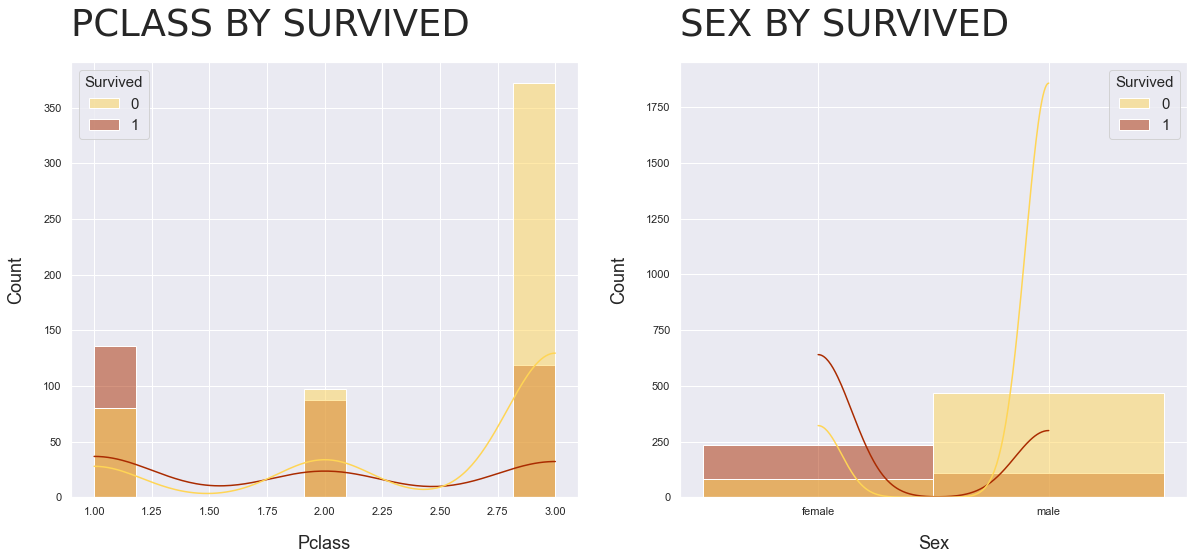

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, col in enumerate(['Pclass', 'Sex',]):
    sns.histplot(x=col, data=df_train, hue="Survived", fill=True, ax=ax[i], palette="afmhot_r", kde=True)
    #ax[i].title.set_text(col+" by Survived")
    ax[i].set_title(col.upper()+" BY SURVIVED", x=0.0, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=37)

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


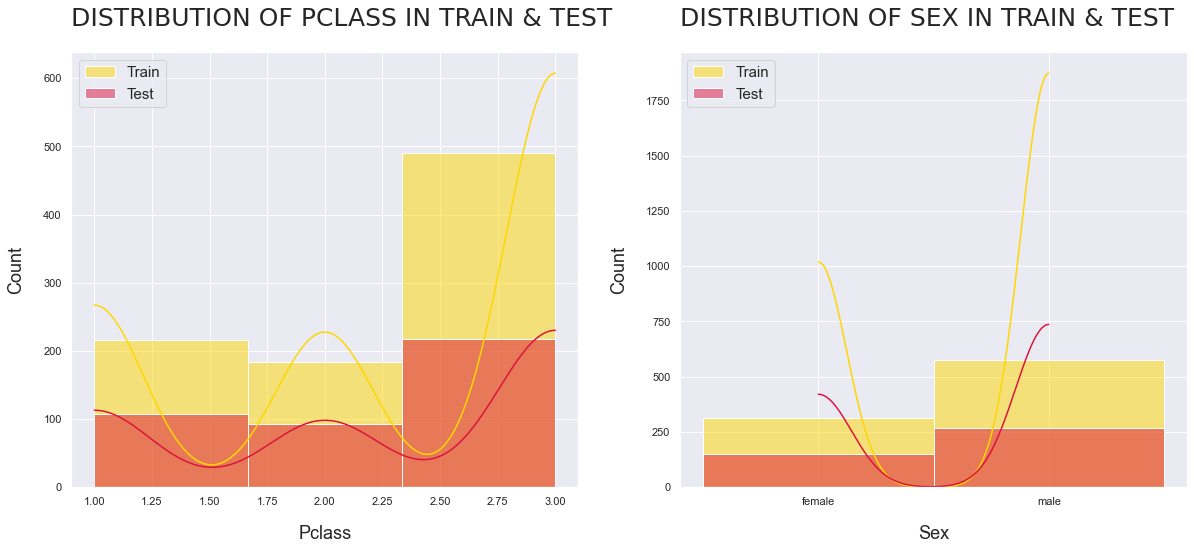

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, col in enumerate(['Pclass', 'Sex',]):
    n_bins =df_train[col].unique().shape[0]
    sns.histplot(df_train[col], color="gold", kde=True, bins=n_bins,
                 label='Train', ax=ax[i], legend=True)
    sns.histplot(df_test[col], color="crimson", kde=True, bins=n_bins,
                 label='Test', ax=ax[i], legend=True)
    #ax[i].title.set_text(col+" by Survived")
    ax[i].set_title("DISTRIBUTION OF {} IN TRAIN & TEST".format(col.upper())
                    , x=0.0, y=1.01, ha='left', fontweight=100, fontfamily='Lato', size=25)
    ax[i].legend(loc='upper left')

<a id="sibpar"></a>
## 3.4 Analysis of SibSp & Panch

Passengers without Siblings/Spouse and Parents/Children accompanying them seems to have a low survival rate.

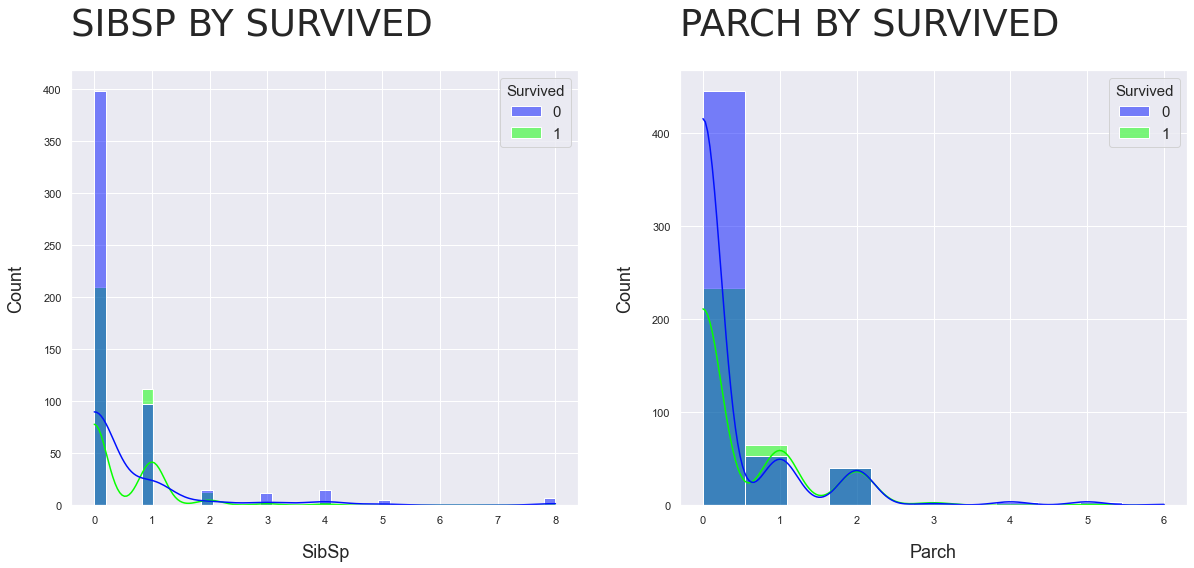

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, col in enumerate(['SibSp', 'Parch']):
    sns.histplot(x=col, data=df_train, hue="Survived", fill=True, ax=ax[i], palette="hsv_r", kde=True)
    ax[i].set_title(col.upper()+" BY SURVIVED", x=0.0, y=1.03, ha='left',
             fontweight=100, fontfamily='Lato', size=37)

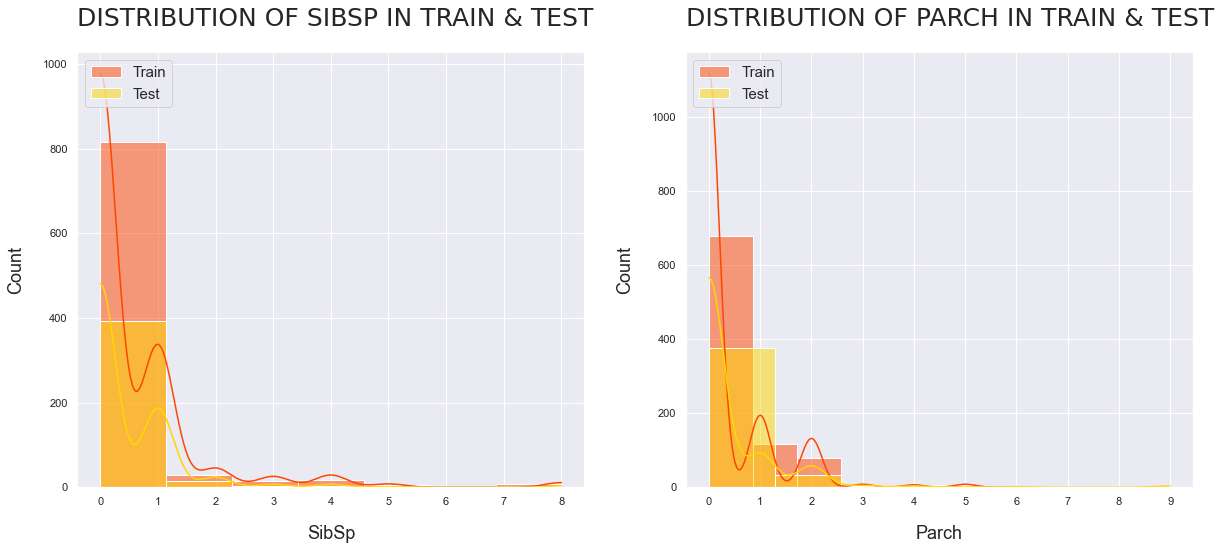

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, col in enumerate(['SibSp', 'Parch']):
    n_bins = df_train[col].unique().shape[0]
    hist1 = sns.histplot(df_train[col], color="orangered", kde=True, bins=n_bins,
                 label='Train', ax=ax[i], legend=True)
    hist2 = sns.histplot(df_test[col], color="gold", kde=True, bins=n_bins,
                 label='Test', ax=ax[i], legend=True)
    #ax[i].title.set_text(col+" by Survived")
    ax[i].set_title("DISTRIBUTION OF {} IN TRAIN & TEST".format(col.upper())
                    , x=0.0, y=1.01, ha='left', fontweight=100, fontfamily='Lato', size=25)
    ax[i].legend(loc='upper left')
    
    hist1.xaxis.set_major_locator(ticker.MultipleLocator(1))
    hist2.xaxis.set_major_formatter(ticker.ScalarFormatter())

<a id="density"></a>
## 3.5 Few more plots of Feature densities


findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


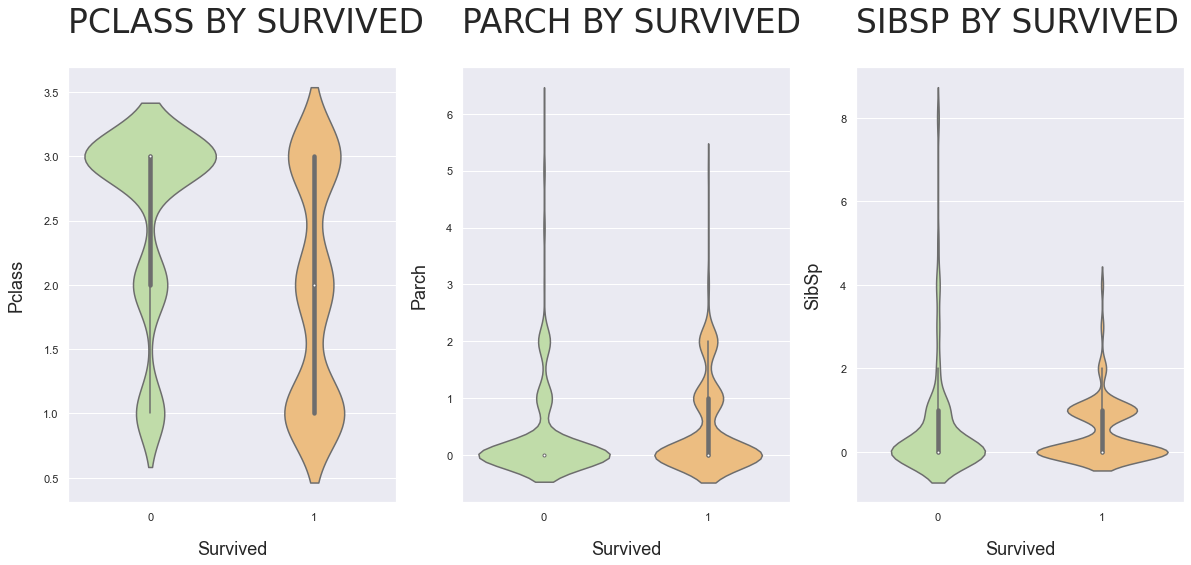

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(20,8))
for i, col in enumerate(['Pclass', 'Parch', 'SibSp']):
    sns.violinplot(x="Survived", y=col, data=df_train, ax=ax[i], palette="Spectral_r", orient="v")
    ax[i].set_title(col.upper()+" BY SURVIVED", x=0.0, y=1.03, ha='left',
         fontweight=200, fontfamily='Lato', size=33)

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


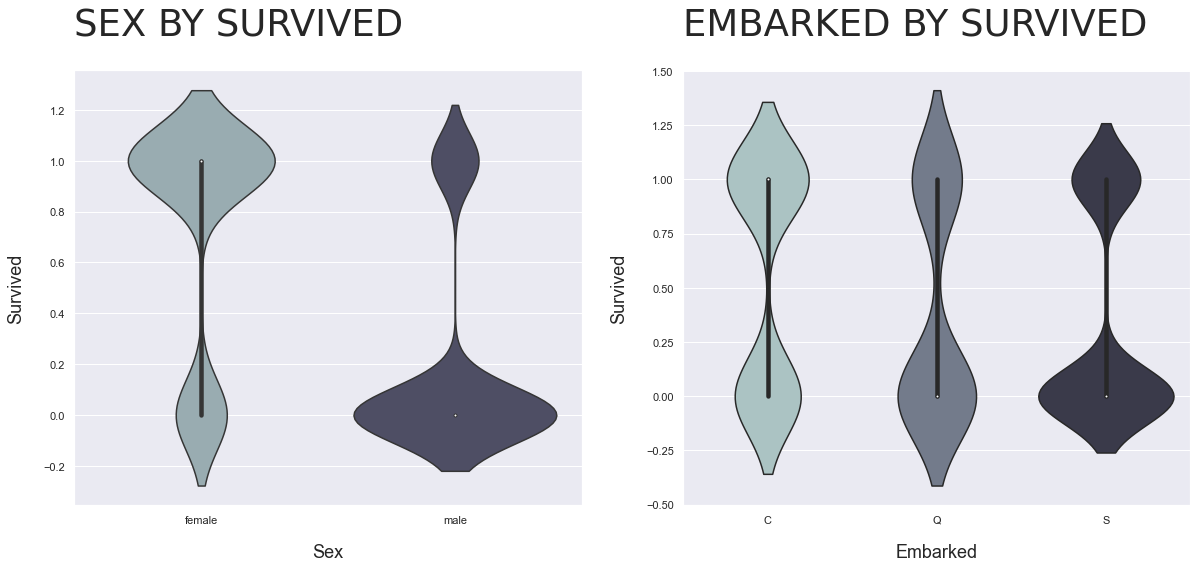

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
for i, col in enumerate(['Sex', 'Embarked']):
    sns.violinplot(y="Survived", x=col, data=df_train, ax=ax[i], palette="bone_r", orient="v")
    ax[i].set_title(col.upper()+" BY SURVIVED", x=0.0, y=1.03, ha='left',
         fontweight=200, fontfamily='Lato', size=37)

<a id="rel"></a>
## 3.6 Exploration of Feature Relationships

The relationships of features and their behaviour can be used later to derive new features.

In [15]:
fig = px.scatter(df_train,
                 x="Fare", y="Age", color="Survived", size="Pclass",
                 log_x=True, size_max=8, color_continuous_scale=['crimson', 'cyan'],
                 marginal_x='violin', marginal_y='histogram',
                 template='plotly', title='<span style="font-weight: 100;">AGE VS FARE BY SURVIVED</span>')

fig.update_layout(
    title_x=0.08,
    title_font_size=32,
    title_font_color='black'
)

fig.show()

In [16]:
trace1=go.Scatter3d(x=df_train['Age'], y=df_train['Pclass'], z=df_train['Fare'],
                   mode='markers', marker=dict(size=3,colorscale='rdylbu',color=df_train['Survived']),
                                             opacity=0.8, 
                    scene = 'scene')
layout = go.Layout(
    scene = Scene(
        xaxis=go.layout.scene.XAxis(title='Age'),
        yaxis=go.layout.scene.YAxis(title='Pclass'),
        zaxis=go.layout.scene.ZAxis(title='Fare')
    ),
    title='<span style="font-weight: 100;">AGE VS FARE VS PCLASS BY SURVIVED</span>',
    title_x=0.08,
    title_font_size=32,
    title_font_color='black',
    font=dict(
        size=10,
        color="RebeccaPurple"
    )  
)

fig = Figure(data=trace1, layout=layout)
fig.show()

NameError: name 'Figure' is not defined

In [17]:
fig = px.histogram(df_train, x="Age", y="Fare", color="Survived",
                   facet_row="Pclass", facet_col="Sex")

fig.update_layout(
    title='<span style="font-weight: 100;">AGE VS FARE VS PCLASS BY SURVIVED</span>',
    title_x=0.08,
    height=500,
    title_font_size=32,
    title_font_color='black'
)

fig.show()

In [18]:
fig = px.scatter(df_train, x="Age", y="Fare", color="Survived",
                   facet_row="Pclass", facet_col="Sex", color_continuous_scale='PiYg')

fig.update_layout(
    title='<span style="font-weight: 100;">AGE VS FARE VS PCLASS BY SURVIVED</span>',
    title_x=0.08,
    height=500,
    title_font_size=32,
    title_font_color='black'
)

fig.show()

In [19]:
fig = px.histogram(df_train, x="SibSp", y="Parch", color="Survived",
                   facet_row="Pclass", facet_col="Survived", color_discrete_sequence=['maroon', 'mediumaquamarine'])

fig.update_layout(
    title='<span style="font-weight: 100;">SIBSP VS PARCH VS PCLASS BY SURVIVED</span>',
    title_x=0.08,
    width=900,
    height=700,
    title_font_size=32,
    title_font_color='black'
)

fig.show()

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


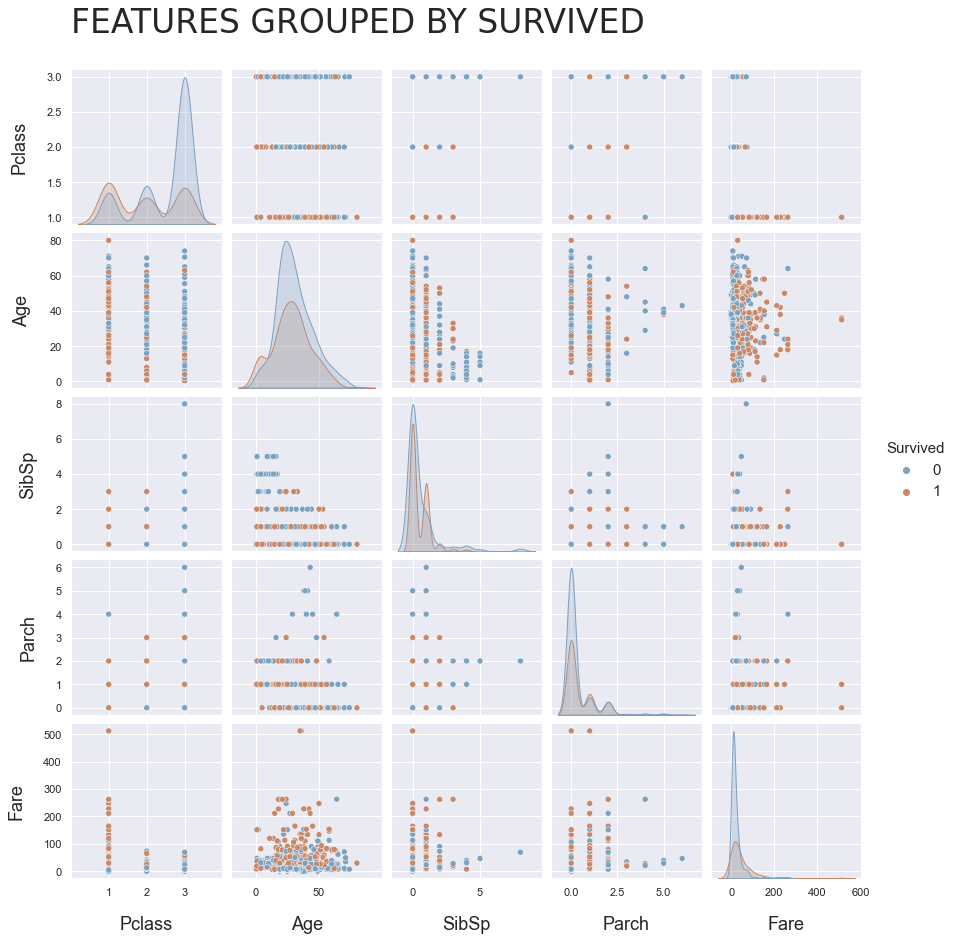

In [20]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']

pair_plt = sns.pairplot(df_train[features], hue="Survived", palette="twilight_shifted",
                 diag_kind="kde", height=2.5)
tmp = pair_plt.fig.suptitle("FEATURES GROUPED BY SURVIVED", x=0.085, y=1.05, ha='left',
             fontweight=100, fontfamily='Lato', size=33)

<a id="fe"></a>
# 4. Feature Engineering & EDA Extended
### Merge Train & Test for Tranformations 

In [21]:
full_df = pd.concat([df_train, df_test]).reset_index(drop=True)

train_shape = df_train.shape
test_shape = df_test.shape

<a id="ensex"></a>
## 4.1 The Encoding of Sex

In [22]:
# Label Encoding
full_df.loc[:, 'Sex'] = (full_df.loc[:, 'Sex'] == 'female').astype(int)

<a id="name"></a>
## 4.2 Let's Analyze & Feature Engineer Name
### 4.2.1 Derive & Plot the Title Feature

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


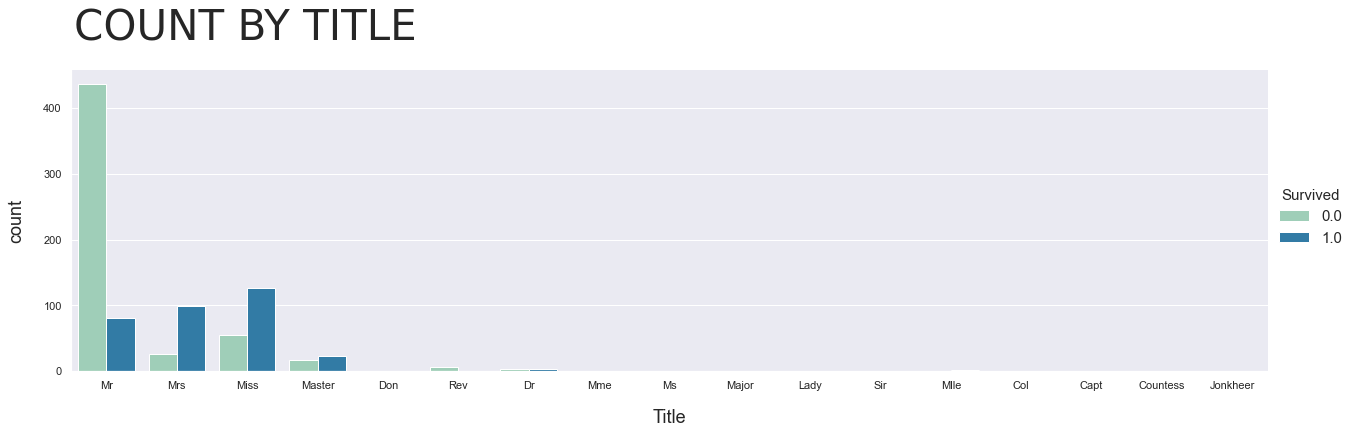

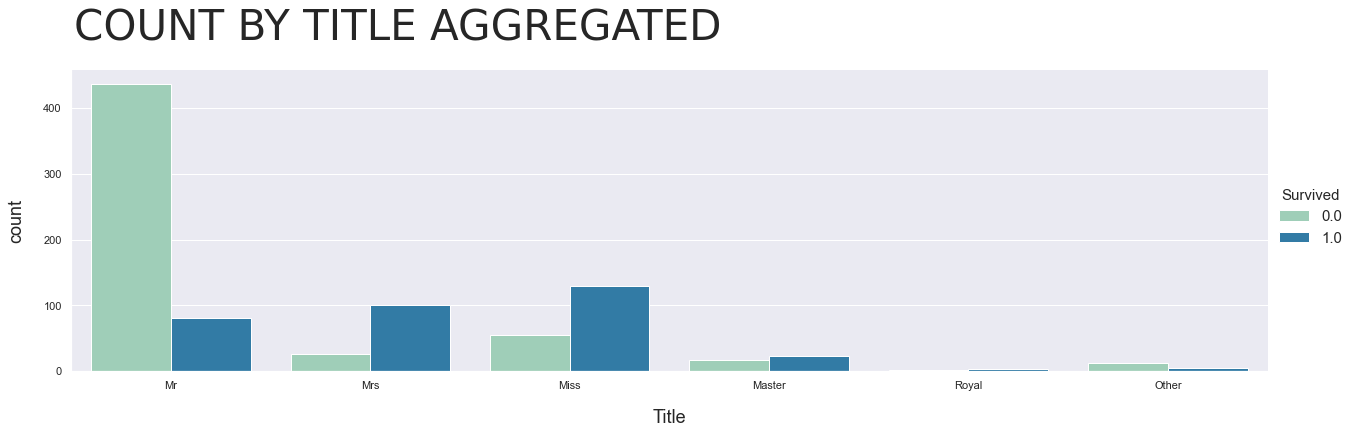

In [23]:
full_df['Title'] = full_df['Name']
full_df['Title'] = full_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

c1 = sns.catplot(x="Title", hue="Survived", kind="count", data=full_df[:train_shape[0]],
                 aspect = 3.5, legend=True, palette="YlGnBu")

title = c1.fig.suptitle("COUNT BY TITLE", x=0.04, y=1.12, ha='left',
             fontweight=100, fontfamily='Lato', size=42)

# Replacing rare titles 
mapping = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Major': 'Other', 
           'Col': 'Other', 'Dr' : 'Other', 'Rev' : 'Other', 'Capt': 'Other', 
           'Jonkheer': 'Royal', 'Sir': 'Royal', 'Lady': 'Royal', 
           'Don': 'Royal', 'Countess': 'Royal', 'Dona': 'Royal'}
           
full_df.replace({'Title': mapping}, inplace=True)

c2 = sns.catplot(x="Title", hue="Survived", kind="count", data=full_df[:train_shape[0]],
                 aspect = 3.5, legend=True, palette="YlGnBu")
c2.fig.suptitle("COUNT BY TITLE AGGREGATED", x=0.04, y=1.12, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

<a id="length"></a>
### 4.2.2 Extract Name Length Feature from Name

The basic intuition behind this feature is that people with longer names tends to be of a higher class and thus would have likely survived. 

<ipython-input-24-203bf0f45503>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



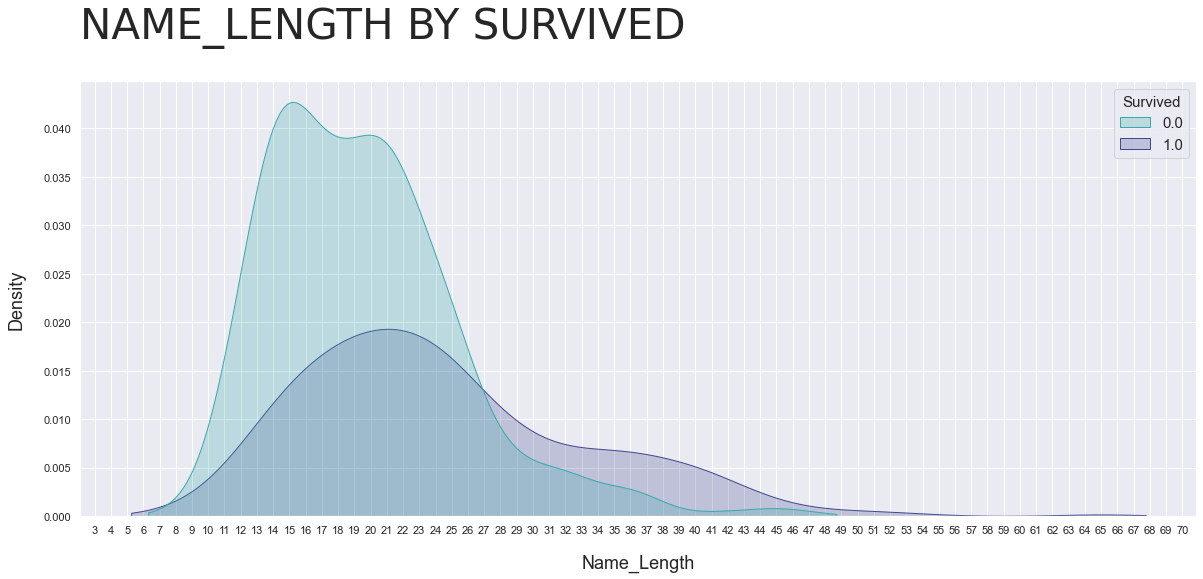

In [24]:
full_df["Name_Length"] = full_df.Name.str.replace("[^a-zA-Z]", "").str.len()

fig, ax = plt.subplots(ncols=1, figsize=(20,8))
kde = sns.kdeplot(x="Name_Length", data=full_df[:train_shape[0]], cut=True,
                  hue="Survived", fill=True, ax=ax, palette="mako_r")

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

fig.suptitle("NAME_LENGTH BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

<a id="oneone"></a>
## 4.3 One-hot Encode Embarked & Label Encode Title

Although Title is one-hot encodeded, it is also label encoded to a categorical feature to help derive other features later.

In [25]:
full_df['Title_C'] = full_df['Title']

full_df = pd.get_dummies(full_df, columns=["Embarked","Title_C"],\
                         prefix=["Emb","Title"], drop_first=False)

title_dict = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Other': 4, 'Royal': 5, 'Master': 6}
full_df['Title'] = full_df['Title'].map(title_dict).astype('int')

<a id="feparsib"></a>
## 4.4 Derive Family Size Feature

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


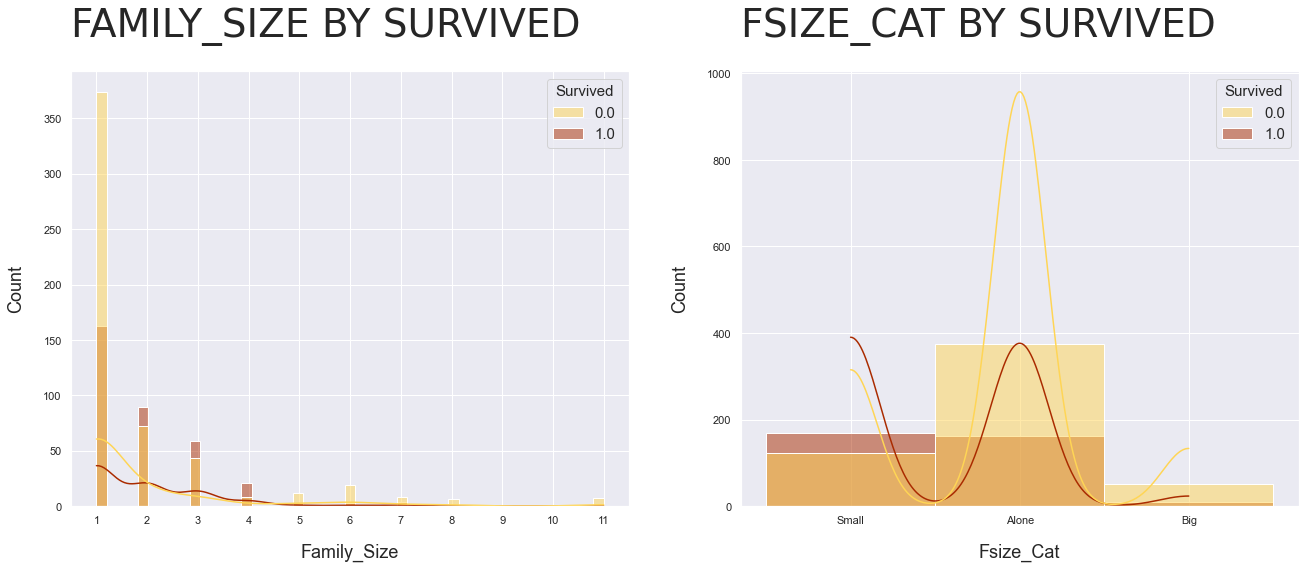

In [26]:
    # New feature : Family_size
    full_df['Family_Size'] = full_df['Parch'] + full_df['SibSp'] + 1

    full_df['Fsize_Cat'] = full_df['Family_Size'].map(lambda val: 'Alone' if val <= 1 else ('Small' if val < 5 else 'Big'))

    fig, ax = plt.subplots(ncols=2, figsize=(22,8))
    for i, col in enumerate(['Family_Size', 'Fsize_Cat']):
        sns.histplot(x=col, data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax[i], palette="afmhot_r", kde=True)
        ax[i].set_title(col.upper()+" BY SURVIVED", x=0.0, y=1.03, ha='left',
             fontweight=200, fontfamily='Lato', size=39)
        if(col=='Family_Size'):
            ax[i].xaxis.set_major_locator(ticker.MultipleLocator(1))
            ax[i].xaxis.set_major_formatter(ticker.ScalarFormatter())

<a id="encfam"></a>
## 4.5 Label Encoding Family Size

In [27]:
Fsize_dict = {'Alone':3, 'Small':2, 'Big':1}
full_df['Fsize_Cat'] = full_df['Fsize_Cat'].map(Fsize_dict).astype('int')

<a id="famname"></a>
## 4.6 Extract Family_Name Feature from Name

Using Regex to get the Surname or the Last Name from the Name Feature

In [28]:
full_df['Family_Name'] = full_df['Name'].str.extract('([A-Za-z]+.[A-Za-z]+)\,', expand=True)

<a id="famsurv"></a>
## 4.7 Derive Friends & Family Survival Rate Feature

This seems to be one of the key features that improves scores after a lot of submissions engineering different features each time. 

If passengers with the same Last names are present, we group them and attach a calculated survival rate based on the train survival data. 

For no matching last names, the Ticket feature is used to group and calculate the survival rate in the same way.

From the data, we see Tickets are given to groups travelling together and they all have the same Ticket number.

In [29]:
MEAN_SURVIVAL_RATE = round(np.mean(df_train['Survived']), 4)

full_df['Family_Friends_Surv_Rate'] = MEAN_SURVIVAL_RATE
full_df['Surv_Rate_Invalid'] = 1

for _, grp_df in full_df[['Survived', 'Family_Name', 'Fare', 'Ticket', 'PassengerId']].groupby(['Family_Name', 'Fare']):                       
    if (len(grp_df) > 1):
        if(grp_df['Survived'].isnull().sum() != len(grp_df)):
            for ind, row in grp_df.iterrows():
                full_df.loc[full_df['PassengerId'] == row['PassengerId'],
                            'Family_Friends_Surv_Rate'] = round(grp_df['Survived'].mean(), 4)
                full_df.loc[full_df['PassengerId'] == row['PassengerId'],
                            'Surv_Rate_Invalid'] = 0

for _, grp_df in full_df[['Survived', 'Family_Name', 'Fare', 'Ticket', 'PassengerId', 'Family_Friends_Surv_Rate']].groupby('Ticket'):
    if (len(grp_df) > 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Friends_Surv_Rate'] == 0.) | (row['Family_Friends_Surv_Rate'] == MEAN_SURVIVAL_RATE):
                if(grp_df['Survived'].isnull().sum() != len(grp_df)):
                    full_df.loc[full_df['PassengerId'] == row['PassengerId'],
                                'Family_Friends_Surv_Rate'] = round(grp_df['Survived'].mean(), 4)
                    full_df.loc[full_df['PassengerId'] == row['PassengerId'],
                                'Surv_Rate_Invalid'] = 0

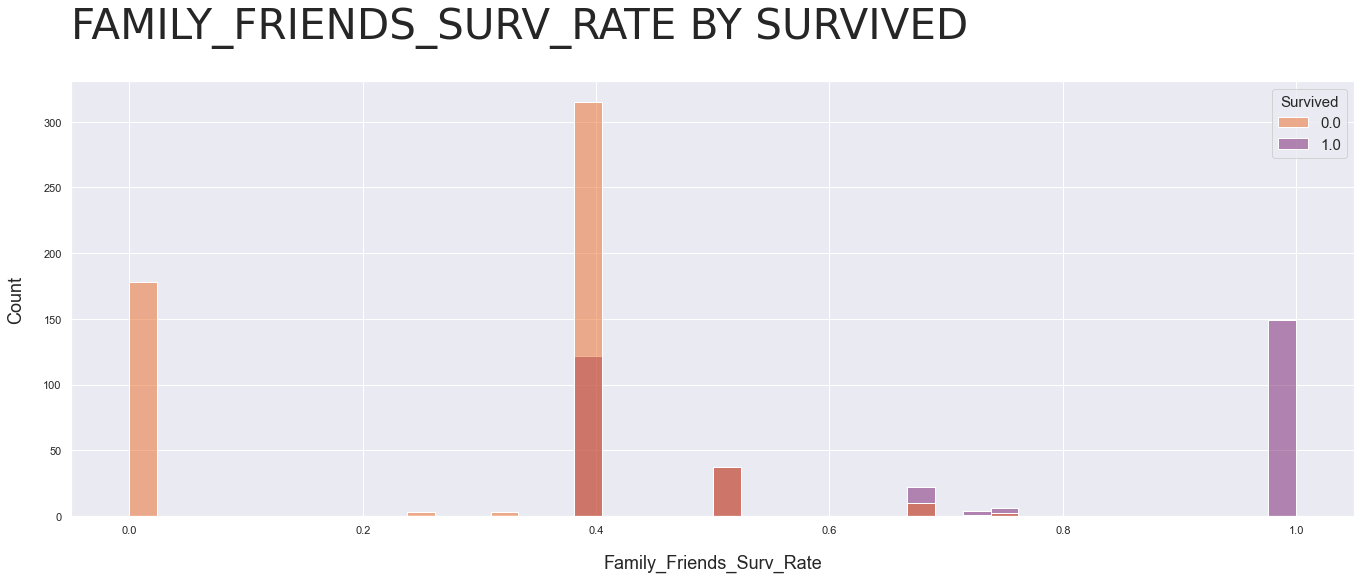

In [30]:
fig, ax = plt.subplots(figsize=(23,8))
sns.histplot(x='Family_Friends_Surv_Rate', data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax, palette="inferno_r")
fig.suptitle("FAMILY_FRIENDS_SURV_RATE BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

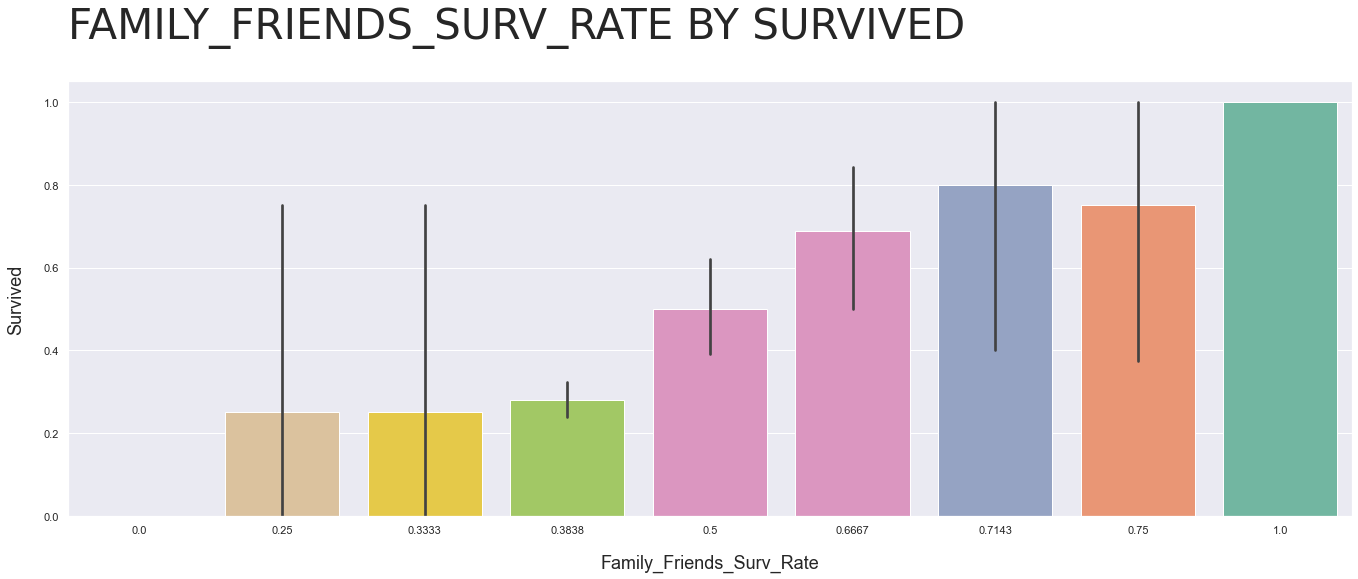

In [31]:
fig, ax = plt.subplots(figsize=(23,8))
sns.barplot(y='Survived', x='Family_Friends_Surv_Rate', data=full_df[:train_shape[0]], ax=ax, palette="Set2_r")
fig.suptitle("FAMILY_FRIENDS_SURV_RATE BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

<a id="morefe"></a>
# 5. Data Cleaning & More Feature Engineering
## 5.1 Cleaning & Encoding of the Cabin

In [32]:
# Replace missing values with 'U' for Cabin
full_df['Cabin'] = full_df['Cabin'].astype('category')
full_df['Cabin'] = full_df['Cabin'].cat.add_categories('U')
full_df['Cabin_Clean'] = full_df['Cabin'].fillna('U')
full_df['Cabin_Clean'] = full_df['Cabin_Clean'].str.strip(' ').str[0]
# Label Encoding
cabin_dict = {'A':9, 'B':8, 'C':7, 'D':6, 'E':5, 'F':4, 'G':3, 'T':2, 'U':1}
full_df['Cabin_Clean'] = full_df['Cabin_Clean'].map(cabin_dict).astype('int')


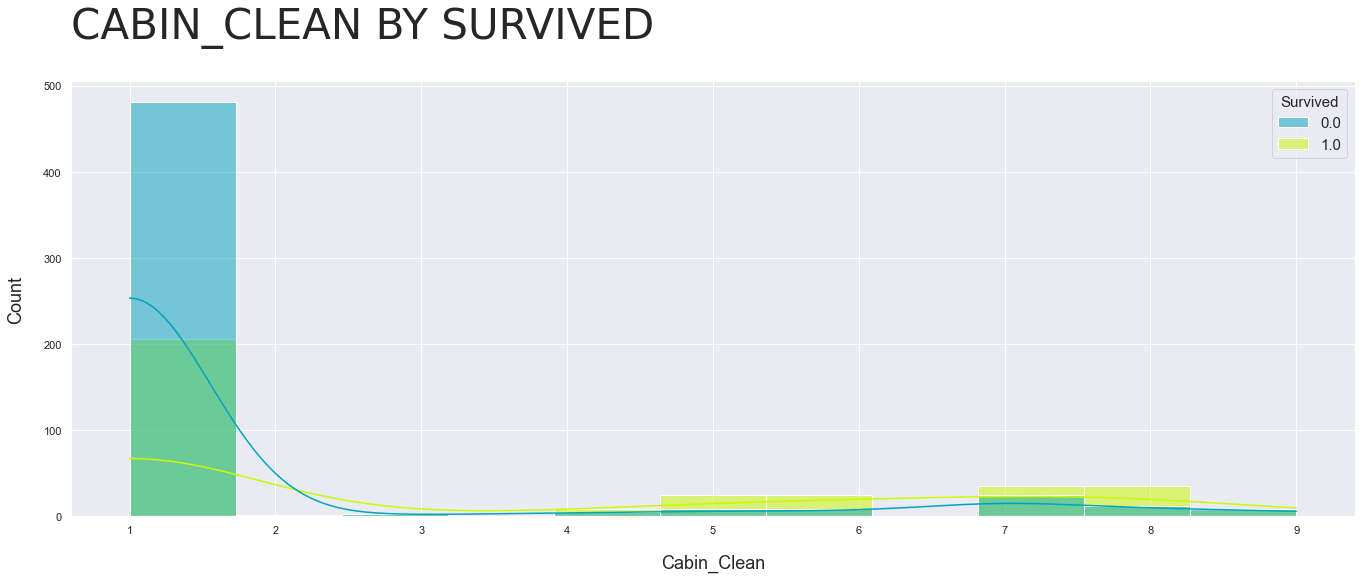

In [33]:
fig, ax = plt.subplots(ncols=1, figsize=(23,8))
sns.histplot(x="Cabin_Clean", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax, palette="nipy_spectral", kde=True)
fig.suptitle("CABIN_CLEAN BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

<a id="cltik"></a>
## 5.2 Cleaning the Ticket

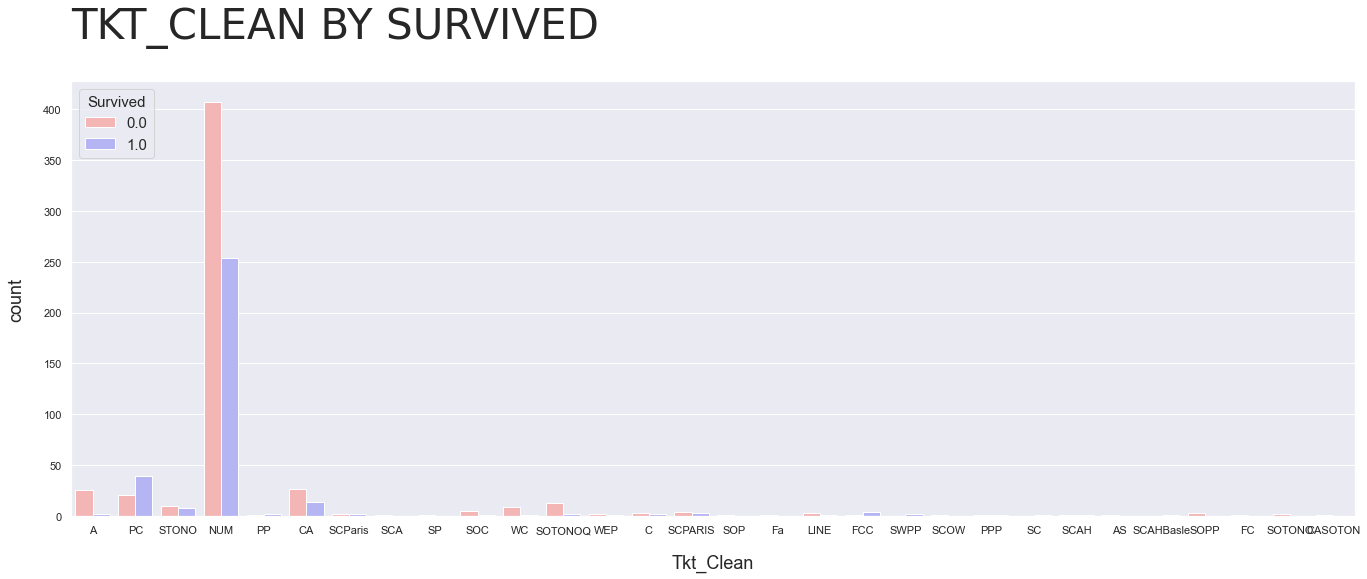

In [34]:
import re
def clean_ticket(each_ticket):
    prefix = re.sub(r'[^a-zA-Z]', '', each_ticket)
    if(prefix):
        return prefix
    else:
        return "NUM"

full_df["Tkt_Clean"] = full_df.Ticket.apply(clean_ticket)

fig, ax = plt.subplots(ncols=1, figsize=(23,8))
sns.countplot(x="Tkt_Clean", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax, palette="bwr_r")
fig.suptitle("TKT_CLEAN BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);

<a id="ticfea"></a>
## 5.3 Derive the Ticket Frequency

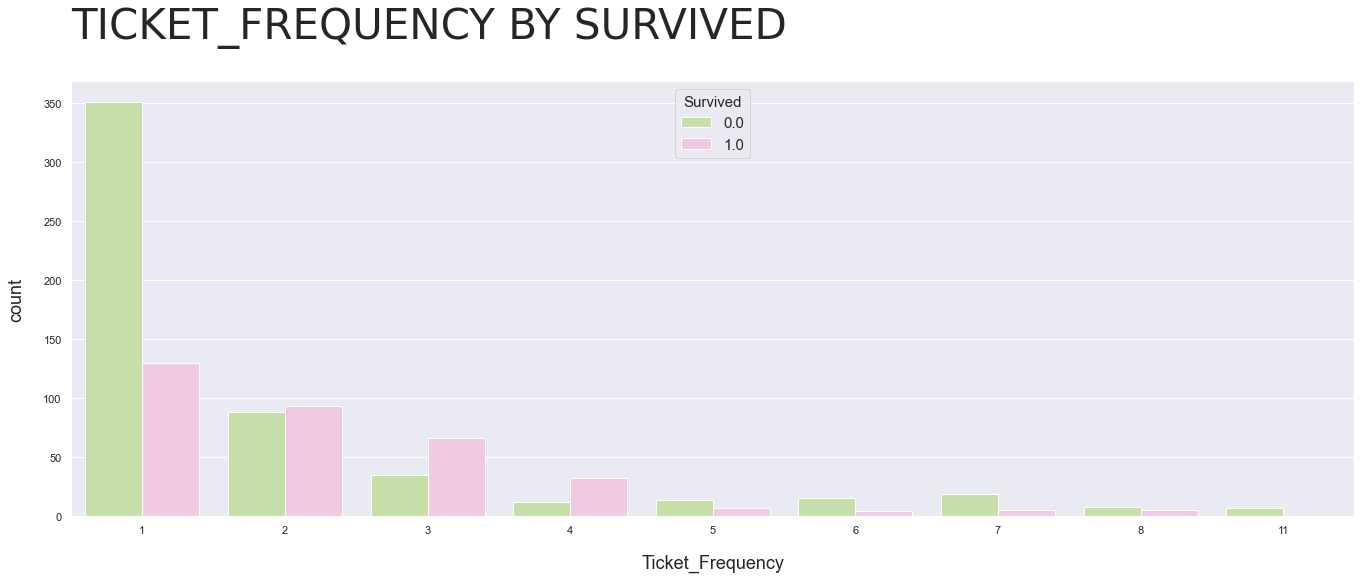

In [35]:
full_df['Ticket_Frequency'] = full_df.groupby('Ticket')['Ticket'].transform('count')
fig, ax = plt.subplots(ncols=1, figsize=(23,8))
sns.countplot(x="Ticket_Frequency", data=full_df[:train_shape[0]], hue="Survived", fill=True, ax=ax, palette="PiYG_r")

fig.suptitle("TICKET_FREQUENCY BY SURVIVED", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=42);


<a id="onetick"></a>
## 5.4 One-hot Encoding Ticket

In [36]:
full_df = pd.get_dummies(full_df, columns=["Tkt_Clean"],\
                          prefix=["Tkt"], drop_first=True)

<a id="farecat"></a>
## 5.5 Fare into Categorical Bins

Kernal density estimation plot of Fare gave us some insights on its distribution and impact on survival. We will use those to add a derived categorical feature from Fare.

In [37]:
def fare_cat(fare):
    if fare <= 7.0:
        return 1
    elif fare <= 39 and fare > 7.0:
        return 2
    else:
        return 3

full_df.loc[:, 'Fare_Cat'] = full_df['Fare'].apply(fare_cat).astype('int')

<a id="der"></a>
## 5.6 Additional Derived Features from Feature Relationships

In [38]:
full_df.loc[:, 'Fare_Family_Size'] = full_df['Fare']/full_df['Family_Size']

full_df.loc[:, 'Fare_Cat_Pclass'] = full_df['Fare_Cat']*full_df['Pclass']
full_df.loc[:, 'Fare_Cat_Title'] = full_df['Fare_Cat']*full_df['Title']

full_df.loc[:, 'Fsize_Cat_Title'] = full_df['Fsize_Cat']*full_df['Title']
full_df.loc[:, 'Fsize_Cat_Fare_Cat'] = full_df['Fare_Cat']/full_df['Fsize_Cat'].astype('int')

full_df.loc[:, 'Pclass_Title'] = full_df['Pclass']*full_df['Title']
full_df.loc[:, 'Fsize_Cat_Pclass'] = full_df['Fsize_Cat']*full_df['Pclass']

### Remove Constant Columns

In [39]:
colsToRemove = []
cols = ['Tkt_AQ', 'Tkt_AS', 'Tkt_C', 'Tkt_CA',
         'Tkt_CASOTON', 'Tkt_FC', 'Tkt_FCC', 'Tkt_Fa', 'Tkt_LINE', 'Tkt_LP',
         'Tkt_NUM', 'Tkt_PC', 'Tkt_PP', 'Tkt_PPP', 'Tkt_SC', 'Tkt_SCA',
         'Tkt_SCAH', 'Tkt_SCAHBasle', 'Tkt_SCOW', 'Tkt_SCPARIS', 'Tkt_SCParis',
         'Tkt_SOC', 'Tkt_SOP', 'Tkt_SOPP', 'Tkt_SOTONO', 'Tkt_SOTONOQ',
         'Tkt_SP', 'Tkt_STONO', 'Tkt_STONOQ', 'Tkt_SWPP', 'Tkt_WC', 
         'Tkt_WEP', 'Fare_Cat', 'Fare_Family_Size', 'Fare_Cat_Pclass',
         'Fare_Cat_Title', 'Fsize_Cat_Title', 'Fsize_Cat_Fare_Cat', 
         'Pclass_Title', 'Fsize_Cat_Pclass']

for col in cols:
    if full_df[col][:train_shape[0]].std() == 0: 
        colsToRemove.append(col)

# remove constant columns in the training set
full_df.drop(colsToRemove, axis=1, inplace=True)
print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `3` Constant Columns

['Tkt_AQ', 'Tkt_LP', 'Tkt_STONOQ']


<a id="mis"></a>
## 5.7 Imputation of Missing Age Values

In [40]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge
# imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, sample_posterior=False, 
#                                  max_iter=4000, tol=0.001, verbose=1,
#                                  n_nearest_features=4, initial_strategy='median')
from sklearn.impute import KNNImputer
imp_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title',
                 'Name_Length', 'Emb_C', 'Emb_Q', 'Emb_S','Family_Size',
                 'Fsize_Cat', 'Family_Friends_Surv_Rate', 'Surv_Rate_Invalid',
                 'Cabin_Clean','Ticket_Frequency', 'Tkt_AS', 'Tkt_C', 'Tkt_CA',
                 'Tkt_CASOTON', 'Tkt_FC', 'Tkt_FCC', 'Tkt_Fa', 'Tkt_LINE',
                 'Tkt_NUM', 'Tkt_PC', 'Tkt_PP', 'Tkt_PPP', 'Tkt_SC', 'Tkt_SCA',
                 'Tkt_SCAH', 'Tkt_SCAHBasle', 'Tkt_SCOW', 'Tkt_SCPARIS', 'Tkt_SCParis',
                 'Tkt_SOC', 'Tkt_SOP', 'Tkt_SOPP', 'Tkt_SOTONO', 'Tkt_SOTONOQ',
                 'Tkt_SP', 'Tkt_STONO', 'Tkt_SWPP', 'Tkt_WC', 
                 'Tkt_WEP', 'Fare_Cat', 'Fare_Family_Size', 'Fare_Cat_Pclass',
                 'Fare_Cat_Title', 'Fsize_Cat_Title', 'Fsize_Cat_Fare_Cat', 
                 'Pclass_Title', 'Fsize_Cat_Pclass']

imputer = KNNImputer(n_neighbors=10, missing_values=np.nan)
# full_df[imp_features] = pd.DataFrame(imputer.fit_transform(full_df[imp_features]), index=full_df.index, columns = imp_features)
imputer.fit(full_df[imp_features])

KNNImputer(n_neighbors=10)

In [58]:
full_df.loc[:, imp_features] = pd.DataFrame(imputer.transform(full_df[imp_features]), index=full_df.index, columns = imp_features)

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


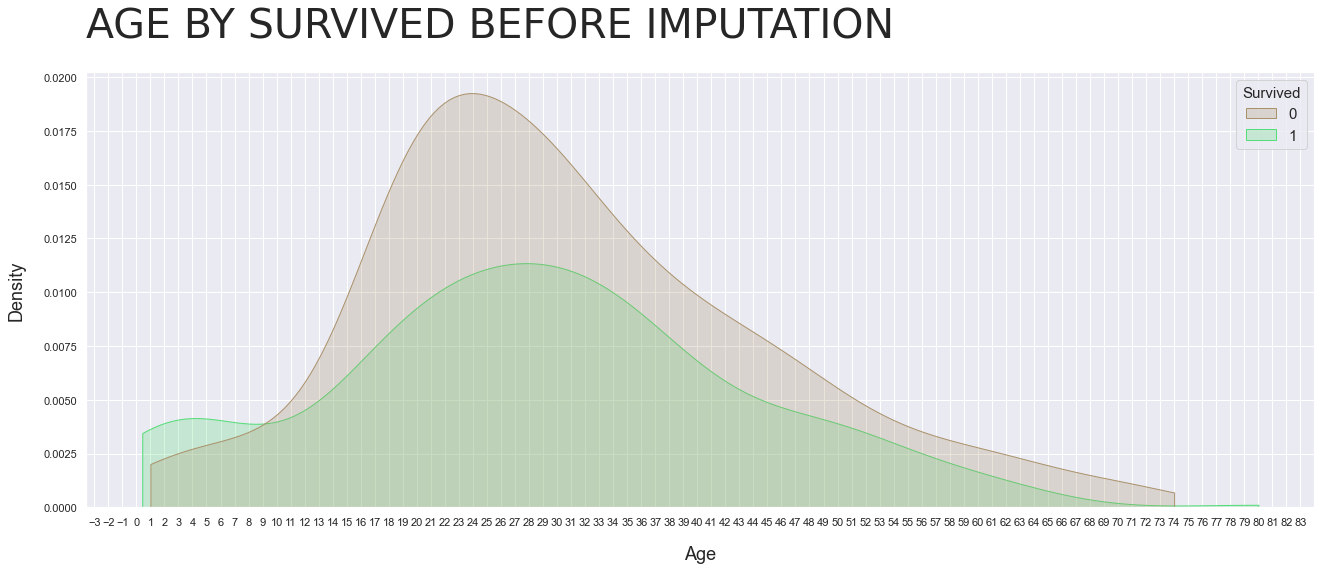

In [41]:
plt.figure(figsize=(22,8))
kde = sns.kdeplot(x="Age", data=df_train, cut=0, hue="Survived", fill=True, legend=True, palette="terrain_r")
#kde.title.set_text("Age by Survived Before Imputation")
title = kde.set_title("AGE BY SURVIVED BEFORE IMPUTATION", x=0.0, y=1.03, ha='left',
             fontweight=100, fontfamily='Lato',
             size=41)

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

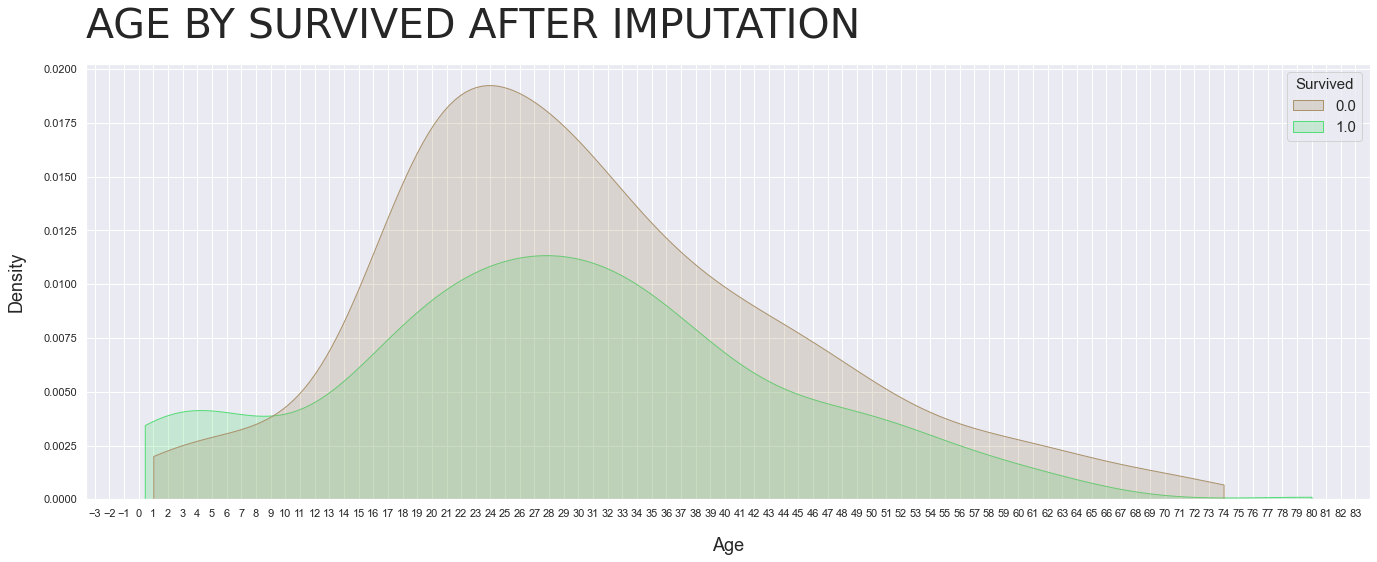

In [42]:
plt.figure(figsize=(23,8))
kde = sns.kdeplot(x="Age", data=full_df[:train_shape[0]], cut=0, hue="Survived", fill=True, legend=True, palette="terrain_r")

title = kde.set_title("AGE BY SURVIVED AFTER IMPUTATION", x=0.0, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=41)

kde.xaxis.set_major_locator(ticker.MultipleLocator(1))
kde.xaxis.set_major_formatter(ticker.ScalarFormatter())

### Comparing Before and After Imputed Dataframes

In [43]:
df_train[df_train.Age.isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [44]:
tmp = full_df[:train_shape[0]]
age_nan_indices = df_train[df_train.Age.isnull()].index.tolist()
tmp.iloc[age_nan_indices, :].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Name_Length,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Royal,Family_Size,Fsize_Cat,Family_Name,Family_Friends_Surv_Rate,Surv_Rate_Invalid,Cabin_Clean,Ticket_Frequency,Tkt_AS,Tkt_C,Tkt_CA,Tkt_CASOTON,Tkt_FC,Tkt_FCC,Tkt_Fa,Tkt_LINE,Tkt_NUM,Tkt_PC,Tkt_PP,Tkt_PPP,Tkt_SC,Tkt_SCA,Tkt_SCAH,Tkt_SCAHBasle,Tkt_SCOW,Tkt_SCPARIS,Tkt_SCParis,Tkt_SOC,Tkt_SOP,Tkt_SOPP,Tkt_SOTONO,Tkt_SOTONOQ,Tkt_SP,Tkt_STONO,Tkt_SWPP,Tkt_WC,Tkt_WEP,Fare_Cat,Fare_Family_Size,Fare_Cat_Pclass,Fare_Cat_Title,Fsize_Cat_Title,Fsize_Cat_Fare_Cat,Pclass_Title,Fsize_Cat_Pclass
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,1,12,0,1,0,0,0,1,0,0,0,1,3,Moran,0.3838,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8.4583,6,2,3,0.666667,3,9
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,1,23,0,0,1,0,0,1,0,0,0,1,3,Williams,0.3838,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13.0000,4,2,3,0.666667,2,6
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,3,19,1,0,0,0,0,0,1,0,0,1,3,Masselmani,0.3838,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7.2250,6,6,9,0.666667,9,9
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1,18,1,0,0,0,0,1,0,0,0,1,3,Emir,0.3838,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7.2250,6,2,3,0.666667,3,9
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2,21,0,1,0,0,1,0,0,0,0,1,3,O'Dwyer,0.3838,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,7.8792,6,4,6,0.666667,6,9


<a id="chilsen"></a>
## 5.8 Obtain Features for Children & Seniors

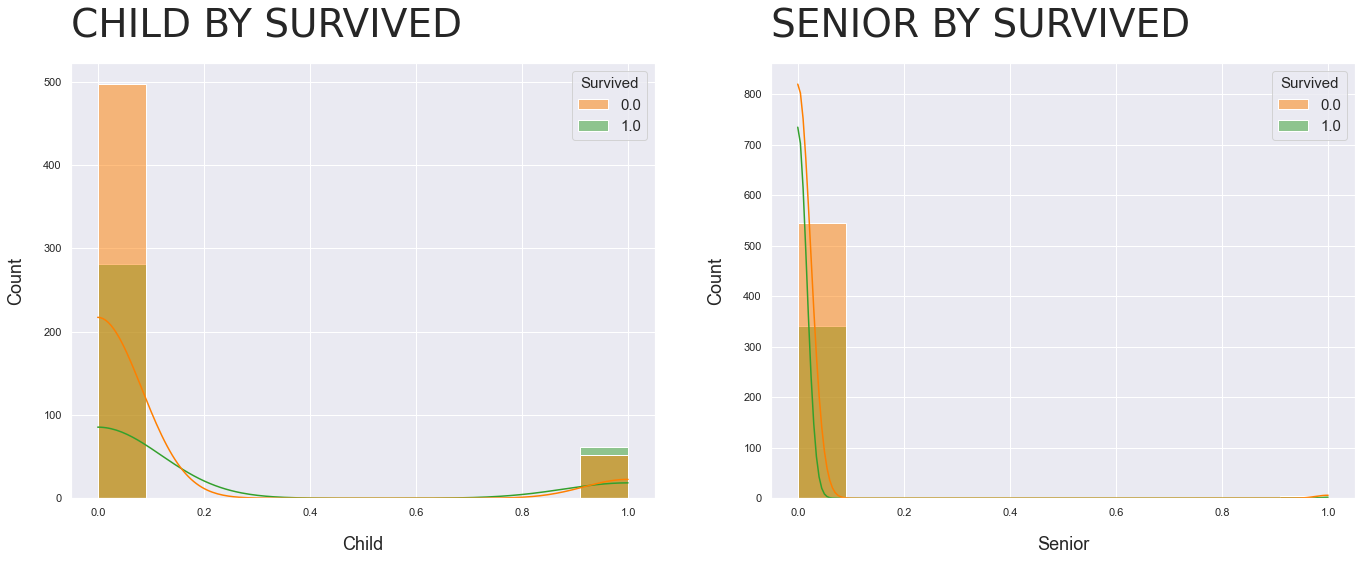

In [45]:
full_df['Child'] = full_df['Age'].map(lambda val:1 if val<18 else 0)
full_df['Senior'] = full_df['Age'].map(lambda val:1 if val>70 else 0)

fig, ax = plt.subplots(ncols=2, figsize=(23,8))

for i, col in enumerate(['Child', 'Senior']):
    sns.histplot(x=col, hue='Survived', data=full_df[:train_shape[0]],
                 ax=ax[i], fill=True, palette="Paired_r", kde=True)
    ax[i].set_title(col.upper()+" BY SURVIVED", x=0.0, y=1.01, ha='left',
         fontweight=200, fontfamily='Lato', size=39)

### Split Data back to Train and Test

In [46]:
df_train_final = full_df[:train_shape[0]]
df_test_final = full_df[train_shape[0]:]

<a id="eder"></a>
## 5.9 Exploration of Derived Features

In [47]:
viz_features = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
                'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin',
                'Title', 'Name_Length', 'Family_Friends_Surv_Rate', 
                'Ticket_Frequency']

train_viz = df_train_final[viz_features]

In [48]:
fig = px.scatter(train_viz,
                 x="Name_Length", y="Family_Friends_Surv_Rate", color="Survived", size="Pclass",
                 size_max=8, color_continuous_scale=['maroon', 'mediumaquamarine'],
                 marginal_x='histogram', marginal_y='histogram',
                 template='plotly', title='<span style="font-weight: 100;">NAME_LENGTH VS SURV_RATE BY SURVIVED</span>')

fig.update_layout(
    title_x=0.08,
    title_font_size=30,
    title_font_color='black'
)

fig.show()

In [49]:
fig = px.scatter(train_viz,
                 x="Name_Length", y="Ticket_Frequency", color="Survived", size="Pclass",
                 size_max=8, color_continuous_scale=['goldenrod', 'cadetblue'],
                 marginal_x='histogram', marginal_y='histogram',
                 template='plotly', title='<span style="font-weight: 100;">NAME_LENGTH VS TKT_FREQ BY SURVIVED</span>')

fig.update_layout(
    title_x=0.08,
    title_font_size=30,
    title_font_color='black'
)

fig.show()

<a id="pik"></a>
## 5.10 Pickle & Store Dataframes for Later

In [50]:
full_df.to_pickle("full_df")
df_train_final.to_pickle("df_train_final")
df_test_final.to_pickle("df_test_final")

In [ ]:
# df_train_final = pd.read_pickle("../input/titanic-test/df_train_final")
# df_test_final = pd.read_pickle("../input/titanic-test/df_test_final")

<a id="sca"></a>
## 5.11 Standard Scaling Data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler_cols = ['Age', 'Fare', 'Name_Length', 'Family_Size', 'Name_Length',
               'Ticket_Frequency', 'Fare_Family_Size', 'Fare_Cat_Pclass']
std = StandardScaler()
std.fit(df_train_final[scaler_cols])
df_train_final.loc[:, scaler_cols] = pd.DataFrame(std.transform(df_train_final[scaler_cols]), index=df_train_final.index, columns = scaler_cols)
df_test_final.loc[:, scaler_cols] = pd.DataFrame(std.transform(df_test_final[scaler_cols]), index=df_test_final.index, columns = scaler_cols)

ValueError: Setting with non-unique columns is not allowed.

In [70]:
df_train_final.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Name_Length,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Royal,Family_Size,Fsize_Cat,Family_Friends_Surv_Rate,Surv_Rate_Invalid,Cabin_Clean,Ticket_Frequency,Tkt_AS,Tkt_C,Tkt_CA,Tkt_CASOTON,Tkt_FC,Tkt_FCC,Tkt_Fa,Tkt_LINE,Tkt_NUM,Tkt_PC,Tkt_PP,Tkt_PPP,Tkt_SC,Tkt_SCA,Tkt_SCAH,Tkt_SCAHBasle,Tkt_SCOW,Tkt_SCPARIS,Tkt_SCParis,Tkt_SOC,Tkt_SOP,Tkt_SOPP,Tkt_SOTONO,Tkt_SOTONOQ,Tkt_SP,Tkt_STONO,Tkt_SWPP,Tkt_WC,Tkt_WEP,Fare_Cat,Fare_Family_Size,Fare_Cat_Pclass,Fare_Cat_Title,Fsize_Cat_Title,Fsize_Cat_Fare_Cat,Pclass_Title,Fsize_Cat_Pclass,Child,Senior
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.00000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,-6.719279e-17,0.523008,0.381594,-4.373606e-17,1.797980,-5.681949e-17,0.188552,0.086420,0.722783,0.044893,0.207632,0.580247,0.141414,0.020202,0.005612,2.502051e-16,2.533109,0.434298,0.49046,2.283951,-1.029230e-16,0.001122,0.005612,0.046016,0.001122,0.001122,0.005612,0.001122,0.004489,0.741863,0.067340,0.003367,0.002245,0.001122,0.001122,0.002245,0.001122,0.001122,0.007856,0.004489,0.006734,0.001122,0.003367,0.002245,0.016835,0.001122,0.020202,0.002245,0.011223,0.003367,2.176207,-4.585433e-17,1.135144e-16,4.005612,4.199776,0.965956,4.047138,5.870932,0.134680,0.005612
std,257.353842,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,1.000562e+00,1.237811,1.000562e+00,0.391372,0.281141,0.447876,0.207186,0.405840,0.493796,0.348644,0.140770,0.074743,1.000562e+00,0.623305,0.310462,0.50019,2.460739,1.000562e+00,0.033501,0.074743,0.209637,0.033501,0.033501,0.074743,0.033501,0.066890,0.437855,0.250751,0.057961,0.047351,0.033501,0.033501,0.047351,0.033501,0.033501,0.088337,0.066890,0.081830,0.033501,0.057961,0.047351,0.128725,0.033501,0.140770,0.047351,0.105403,0.057961,0.456336,1.000562e+00,1.000562e+00,3.069416,2.403752,0.503633,3.303049,2.697930,0.341573,0.074743
min,1.000000,0.000000,1.000000,0.000000,-2.189445e+00,0.000000,0.000000,-6.484217e-01,1.000000,-1.770193e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.609748e-01,1.000000,0.000000,0.00000,1.000000,-6.244040e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.559950e-01,-2.340870e+00,1.000000,1.000000,0.333333,1.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,-5.868028e-01,0.000000,0.000000,-4.891482e-01,1.000000,-7.154464e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.609748e-01,2.000000,0.383800,0.00000,1.000000,-6.244040e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-3.536006e-01,-1.115420e+00,2.000000,3.000000,0.666667,2.000000,3.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,-5.706537e-02,0.000000,0.000000,-3.573909e-01,1.000000,-1.880729e-01,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0

<a id="sel"></a>
## 5.12 Select Features for Training

In [71]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Name_Length', 'Emb_C',
       'Emb_Q', 'Emb_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Royal', 'Family_Size', 'Fsize_Cat',
       'Family_Friends_Surv_Rate', 'Surv_Rate_Invalid', 'Cabin_Clean',
       'Ticket_Frequency', 'Tkt_AS', 'Tkt_C', 'Tkt_CA',
       'Tkt_CASOTON', 'Tkt_FC', 'Tkt_FCC', 'Tkt_Fa', 'Tkt_LINE', 
       'Tkt_NUM', 'Tkt_PC', 'Tkt_PP', 'Tkt_PPP', 'Tkt_SC', 'Tkt_SCA',
       'Tkt_SCAH', 'Tkt_SCAHBasle', 'Tkt_SCOW', 'Tkt_SCPARIS', 'Tkt_SCParis',
       'Tkt_SOC', 'Tkt_SOP', 'Tkt_SOPP', 'Tkt_SOTONO', 'Tkt_SOTONOQ', 'Tkt_SP',
       'Tkt_STONO', 'Tkt_SWPP', 'Tkt_WC', 'Tkt_WEP', 'Fare_Cat',
       'Fare_Family_Size', 'Fare_Cat_Pclass', 'Fare_Cat_Title',
       'Fsize_Cat_Title', 'Fsize_Cat_Fare_Cat', 'Pclass_Title',
       'Fsize_Cat_Pclass', 'Child', 'Senior']
features_train = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Name_Length', 'Emb_C',
       'Emb_Q', 'Emb_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Royal', 'Family_Size', 'Fsize_Cat',
       'Family_Friends_Surv_Rate', 'Surv_Rate_Invalid', 'Cabin_Clean',
       'Ticket_Frequency', 'Tkt_AS', 'Tkt_C', 'Tkt_CA',
       'Tkt_CASOTON', 'Tkt_FC', 'Tkt_FCC', 'Tkt_Fa', 'Tkt_LINE',
       'Tkt_NUM', 'Tkt_PC', 'Tkt_PP', 'Tkt_PPP', 'Tkt_SC', 'Tkt_SCA',
       'Tkt_SCAH', 'Tkt_SCAHBasle', 'Tkt_SCOW', 'Tkt_SCPARIS', 'Tkt_SCParis',
       'Tkt_SOC', 'Tkt_SOP', 'Tkt_SOPP', 'Tkt_SOTONO', 'Tkt_SOTONOQ', 'Tkt_SP',
       'Tkt_STONO', 'Tkt_SWPP', 'Tkt_WC', 'Tkt_WEP', 'Fare_Cat',
       'Fare_Family_Size', 'Fare_Cat_Pclass', 'Fare_Cat_Title',
       'Fsize_Cat_Title', 'Fsize_Cat_Fare_Cat', 'Pclass_Title',
       'Fsize_Cat_Pclass', 'Child', 'Senior']

df_train_final = df_train_final[features_train]
df_test_final = df_test_final[features]

<a id="corr"></a>
# 6. Checking Feature Importance by Correlation Analysis

In [72]:
corr_mat = df_train_final.astype(float).corr()
corr_mat_fil = corr_mat.loc[:, 'Survived'].sort_values(ascending=False)
corr_mat_fil = pd.DataFrame(data=corr_mat_fil[1:])

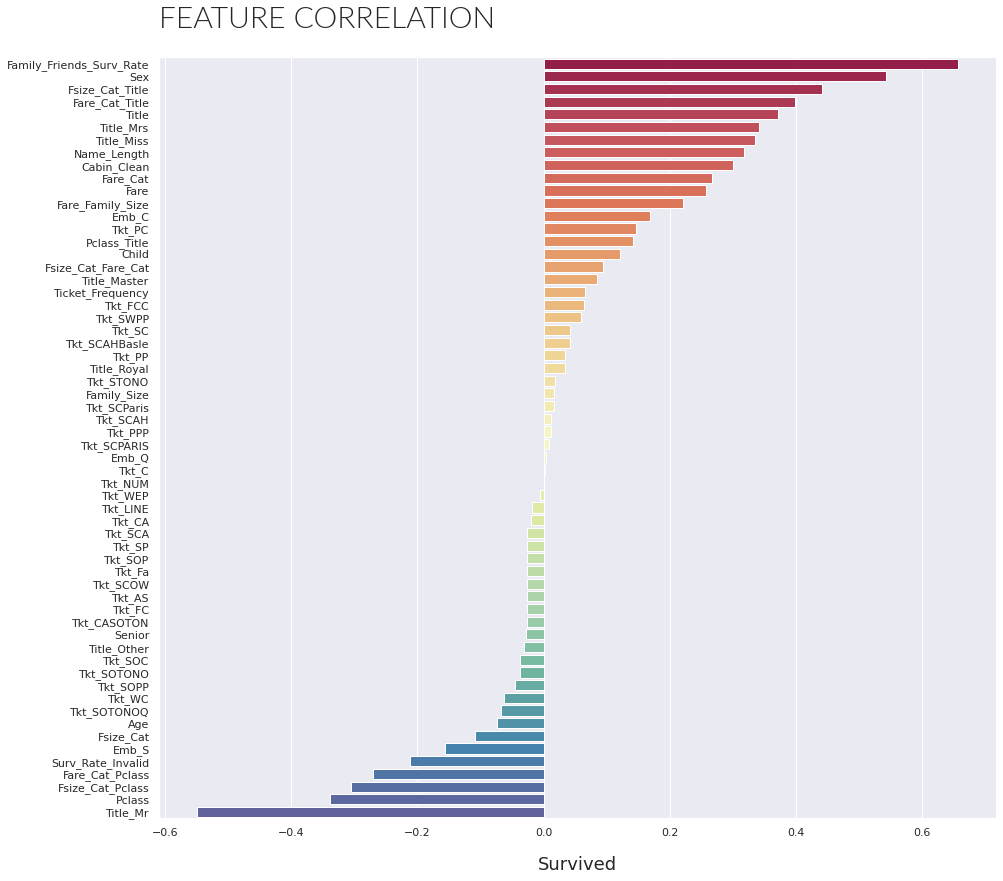

In [73]:
plt.figure(figsize=(15,14))
bar = sns.barplot(x=corr_mat_fil.Survived, y=corr_mat_fil.index, data=corr_mat_fil, palette="Spectral")
title = bar.set_title("FEATURE CORRELATION", x=0.0, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=30)


<a id="trte"></a>
# 7. Preparation of Train & Test Data

In [74]:
features = df_test_final.columns.to_list()
X_train = df_train_final[features]
Y_train = df_train_final['Survived']
X_test = df_test_final

<a id="mdev"></a>
# 8. Model Development

### Import Libraries

In [75]:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout, BatchNormalization,Concatenate, concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Adagrad, Adam, Nadam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.metrics import *

<a id="mbul"></a>
## 8.1 Model Architecture Definition

In [76]:
metrics = ['accuracy', 
           Precision(),
           Recall()]

In [77]:
def create_model():
    model = Sequential()
    model.add(Input(shape=X_train.shape[1], name='Input_'))
    model.add(Dense(8, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.001)))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))

    model.summary()
    optimize = Adam(lr = 0.0001)
    model.compile(optimizer = optimize, 
                       loss = 'binary_crossentropy', 
                       metrics = metrics)
    return model

<a id="cross"></a>
## 8.2 Setting Cross-validation Scheme & Model Training

In [78]:
estimator = KerasClassifier(build_fn = create_model, epochs = 600, batch_size = 32, verbose = 1)
kfold = StratifiedKFold(n_splits = 3)
results = cross_val_score(estimator, X_train, Y_train, cv = kfold)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 488       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 921
Trainable params: 921
Non-trainable params: 0
__________________________________________________________

19/19 [==============================] - 0s 2ms/step - loss: 1.3492 - accuracy: 0.7306 - precision: 0.7742 - recall: 0.4211
Epoch 112/600
19/19 [==============================] - 0s 2ms/step - loss: 1.3496 - accuracy: 0.6987 - precision: 0.7207 - recall: 0.3509
Epoch 113/600
19/19 [==============================] - 0s 2ms/step - loss: 1.3378 - accuracy: 0.7222 - precision: 0.8058 - recall: 0.3640
Epoch 114/600
19/19 [==============================] - 0s 2ms/step - loss: 1.3491 - accuracy: 0.6936 - precision: 0.7556 - recall: 0.2982
Epoch 115/600
19/19 [==============================] - 0s 1ms/step - loss: 1.3382 - accuracy: 0.6919 - precision: 0.7027 - recall: 0.3421
Epoch 116/600
19/19 [==============================] - 0s 2ms/step - loss: 1.3446 - accuracy: 0.6751 - precision: 0.6606 - recall: 0.3158
Epoch 117/600
19/19 [==============================] - 0s 2ms/step - loss: 1.3274 - accuracy: 0.6953 - precision: 0.7080 - recall: 0.3509
Epoch 118/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.7660 - precision: 0.7834 - recall: 0.5395
Epoch 230/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.7710 - precision: 0.7805 - recall: 0.5614
Epoch 231/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.7458 - precision: 0.7452 - recall: 0.5132
Epoch 232/600
19/19 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.7643 - precision: 0.7785 - recall: 0.5395
Epoch 233/600
19/19 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.7677 - precision: 0.7812 - recall: 0.5482
Epoch 234/600
19/19 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.7795 - precision: 0.7771 - recall: 0.5965
Epoch 235/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.7609 - precision: 0.7756 - recall: 0.5307
Epoch 236/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7862 - precision: 0.7853 - recall: 0.6096
Epoch 348/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7778 - precision: 0.7609 - recall: 0.6140
Epoch 349/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.8030 - precision: 0.8171 - recall: 0.6272
Epoch 350/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7761 - precision: 0.7654 - recall: 0.6009
Epoch 351/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7997 - precision: 0.8079 - recall: 0.6272
Epoch 352/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8114 - precision: 0.7959 - recall: 0.6842
Epoch 353/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.8030 - precision: 0.8208 - recall: 0.6228
Epoch 354/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.8098 - precision: 0.8212 - recall: 0.6447
Epoch 466/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.8182 - precision: 0.8191 - recall: 0.6754
Epoch 467/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.8249 - precision: 0.8370 - recall: 0.6754
Epoch 468/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.8232 - precision: 0.8555 - recall: 0.6491
Epoch 469/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8165 - precision: 0.8439 - recall: 0.6404
Epoch 470/600
19/19 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.8350 - precision: 0.8571 - recall: 0.6842
Epoch 471/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7896 - precision: 0.7754 - recall: 0.6360
Epoch 472/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.8266 - precision: 0.8141 - recall: 0.7105
Epoch 584/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7980 - precision: 0.7967 - recall: 0.6360
Epoch 585/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8249 - precision: 0.8370 - recall: 0.6754
Epoch 586/600
19/19 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8384 - precision: 0.8402 - recall: 0.7149
Epoch 587/600
19/19 [==============================] - 0s 2ms/step - loss: 0.4918 - accuracy: 0.8266 - precision: 0.8307 - recall: 0.6886
Epoch 588/600
19/19 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.8215 - precision: 0.8144 - recall: 0.6930
Epoch 589/600
19/19 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.8350 - precision: 0.8571 - recall: 0.6842
Epoch 590/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 1.5225 - accuracy: 0.7088 - precision: 0.7835 - recall: 0.3333
Epoch 93/600
19/19 [==============================] - 0s 2ms/step - loss: 1.5231 - accuracy: 0.6734 - precision: 0.6889 - recall: 0.2719
Epoch 94/600
19/19 [==============================] - 0s 2ms/step - loss: 1.5129 - accuracy: 0.6886 - precision: 0.7363 - recall: 0.2939
Epoch 95/600
19/19 [==============================] - 0s 2ms/step - loss: 1.4949 - accuracy: 0.6953 - precision: 0.7080 - recall: 0.3509
Epoch 96/600
19/19 [==============================] - 0s 2ms/step - loss: 1.4846 - accuracy: 0.6869 - precision: 0.6981 - recall: 0.3246
Epoch 97/600
19/19 [==============================] - 0s 2ms/step - loss: 1.4691 - accuracy: 0.6970 - precision: 0.7308 - recall: 0.3333
Epoch 98/600
19/19 [==============================] - 0s 2ms/step - loss: 1.4693 - accuracy: 0.6902 - precision: 0.7200 - recall: 0.3158
Epoch 99/600
19/19 [==============================] - 

19/19 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.7694 - precision: 0.7630 - recall: 0.5789
Epoch 211/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7621 - accuracy: 0.7542 - precision: 0.7412 - recall: 0.5526
Epoch 212/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7561 - accuracy: 0.7761 - precision: 0.7714 - recall: 0.5921
Epoch 213/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7358 - accuracy: 0.7845 - precision: 0.7747 - recall: 0.6184
Epoch 214/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7388 - accuracy: 0.7593 - precision: 0.7545 - recall: 0.5526
Epoch 215/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7362 - accuracy: 0.7559 - precision: 0.7485 - recall: 0.5482
Epoch 216/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7386 - accuracy: 0.7694 - precision: 0.7571 - recall: 0.5877
Epoch 217/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7896 - precision: 0.7845 - recall: 0.6228
Epoch 328/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7727 - precision: 0.7569 - recall: 0.6009
Epoch 329/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7912 - precision: 0.7889 - recall: 0.6228
Epoch 330/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7879 - precision: 0.7802 - recall: 0.6228
Epoch 331/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7778 - precision: 0.7500 - recall: 0.6316
Epoch 332/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.8013 - precision: 0.7835 - recall: 0.6667
Epoch 333/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7879 - precision: 0.7898 - recall: 0.6096
Epoch 334/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7997 - precision: 0.7824 - recall: 0.6623
Epoch 446/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.8081 - precision: 0.8032 - recall: 0.6623
Epoch 447/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.8081 - precision: 0.8098 - recall: 0.6535
Epoch 448/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7879 - precision: 0.7833 - recall: 0.6184
Epoch 449/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7879 - precision: 0.7802 - recall: 0.6228
Epoch 450/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.8030 - precision: 0.8066 - recall: 0.6404
Epoch 451/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7997 - precision: 0.8011 - recall: 0.6360
Epoch 452/600
19/19 [===========================

19/19 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7946 - precision: 0.7912 - recall: 0.6316
Epoch 564/600
19/19 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.8350 - precision: 0.8186 - recall: 0.7325
Epoch 565/600
19/19 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.8367 - precision: 0.8429 - recall: 0.7061
Epoch 566/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.8148 - precision: 0.8242 - recall: 0.6579
Epoch 567/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7963 - precision: 0.7956 - recall: 0.6316
Epoch 568/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.8215 - precision: 0.8112 - recall: 0.6974
Epoch 569/600
19/19 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8333 - precision: 0.8177 - recall: 0.7281
Epoch 570/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 1.6885 - accuracy: 0.6178 - precision: 0.5294 - recall: 0.0395    
Epoch 73/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6626 - accuracy: 0.6111 - precision: 0.4118 - recall: 0.0307
Epoch 74/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6622 - accuracy: 0.6094 - precision: 0.3000 - recall: 0.0132    
Epoch 75/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6409 - accuracy: 0.6178 - precision: 0.5385 - recall: 0.0307    
Epoch 76/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6353 - accuracy: 0.6195 - precision: 0.5833 - recall: 0.0307
Epoch 77/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6224 - accuracy: 0.6246 - precision: 0.6087 - recall: 0.0614
Epoch 78/600
19/19 [==============================] - 0s 2ms/step - loss: 1.6020 - accuracy: 0.6263 - precision: 0.8000 - recall: 0.0351    
Epoch 79/600
19/19 [==================

19/19 [==============================] - 0s 2ms/step - loss: 0.7883 - accuracy: 0.6987 - precision: 0.6763 - recall: 0.4123
Epoch 190/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7780 - accuracy: 0.7104 - precision: 0.7000 - recall: 0.4298
Epoch 191/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7835 - accuracy: 0.7357 - precision: 0.7795 - recall: 0.4342
Epoch 192/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.7323 - precision: 0.7315 - recall: 0.4781
Epoch 193/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.7054 - precision: 0.7087 - recall: 0.3947
Epoch 194/600
19/19 [==============================] - 0s 1ms/step - loss: 0.7755 - accuracy: 0.7256 - precision: 0.7481 - recall: 0.4298
Epoch 195/600
19/19 [==============================] - 0s 2ms/step - loss: 0.7772 - accuracy: 0.7306 - precision: 0.7500 - recall: 0.4474
Epoch 196/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7407 - precision: 0.7151 - recall: 0.5395
Epoch 308/600
19/19 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7508 - precision: 0.7273 - recall: 0.5614
Epoch 309/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5960 - accuracy: 0.7576 - precision: 0.7442 - recall: 0.5614
Epoch 310/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7559 - precision: 0.7399 - recall: 0.5614
Epoch 311/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.7643 - precision: 0.7391 - recall: 0.5965
Epoch 312/600
19/19 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7626 - precision: 0.7430 - recall: 0.5833
Epoch 313/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7441 - precision: 0.7065 - recall: 0.5702
Epoch 314/600
19/19 [===========================

19/19 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7896 - precision: 0.7725 - recall: 0.6404
Epoch 426/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.7761 - precision: 0.7387 - recall: 0.6447
Epoch 427/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7778 - precision: 0.7330 - recall: 0.6623
Epoch 428/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.7778 - precision: 0.7474 - recall: 0.6360
Epoch 429/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7879 - precision: 0.7684 - recall: 0.6404
Epoch 430/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7862 - precision: 0.7590 - recall: 0.6491
Epoch 431/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.7727 - precision: 0.7569 - recall: 0.6009
Epoch 432/600
19/19 [===========================

19/19 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.8098 - precision: 0.8142 - recall: 0.6535
Epoch 544/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8199 - precision: 0.8418 - recall: 0.6535
Epoch 545/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7879 - precision: 0.8000 - recall: 0.5965
Epoch 546/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.8013 - precision: 0.8161 - recall: 0.6228
Epoch 547/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7929 - precision: 0.7807 - recall: 0.6404
Epoch 548/600
19/19 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7929 - precision: 0.7838 - recall: 0.6360
Epoch 549/600
19/19 [==============================] - 0s 1ms/step - loss: 0.5431 - accuracy: 0.8030 - precision: 0.8101 - recall: 0.6360
Epoch 550/600
19/19 [===========================

### Train the model on full data

In [79]:
train_history = estimator.fit(X_train, Y_train, epochs = 600, batch_size = 32)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 488       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 921
Trainable params: 921
Non-trainable params: 0
________________________________________________________

28/28 [==============================] - 0s 1ms/step - loss: 1.0515 - accuracy: 0.6824 - precision: 0.7438 - recall: 0.2632
Epoch 112/600
28/28 [==============================] - 0s 2ms/step - loss: 1.0421 - accuracy: 0.6779 - precision: 0.7132 - recall: 0.2690
Epoch 113/600
28/28 [==============================] - 0s 2ms/step - loss: 1.0243 - accuracy: 0.6902 - precision: 0.7260 - recall: 0.3099
Epoch 114/600
28/28 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.6824 - precision: 0.7360 - recall: 0.2690
Epoch 115/600
28/28 [==============================] - 0s 1ms/step - loss: 1.0239 - accuracy: 0.6790 - precision: 0.7090 - recall: 0.2778
Epoch 116/600
28/28 [==============================] - 0s 2ms/step - loss: 1.0156 - accuracy: 0.6644 - precision: 0.6838 - recall: 0.2339
Epoch 117/600
28/28 [==============================] - 0s 1ms/step - loss: 1.0013 - accuracy: 0.6947 - precision: 0.7500 - recall: 0.3070
Epoch 118/600
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.7722 - precision: 0.7860 - recall: 0.5585
Epoch 230/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.7811 - precision: 0.7905 - recall: 0.5848
Epoch 231/600
28/28 [==============================] - 0s 1ms/step - loss: 0.5802 - accuracy: 0.7744 - precision: 0.7765 - recall: 0.5789
Epoch 232/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7879 - precision: 0.8000 - recall: 0.5965
Epoch 233/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7957 - precision: 0.8077 - recall: 0.6140
Epoch 234/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7800 - precision: 0.7920 - recall: 0.5789
Epoch 235/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.7621 - precision: 0.7621 - recall: 0.5526
Epoch 236/600
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.8114 - precision: 0.8246 - recall: 0.6462
Epoch 348/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.8103 - precision: 0.7993 - recall: 0.6754
Epoch 349/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.8182 - precision: 0.8261 - recall: 0.6667
Epoch 350/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.8114 - precision: 0.8199 - recall: 0.6520
Epoch 351/600
28/28 [==============================] - 0s 1ms/step - loss: 0.5288 - accuracy: 0.8159 - precision: 0.8179 - recall: 0.6696
Epoch 352/600
28/28 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.8238 - precision: 0.8315 - recall: 0.6784
Epoch 353/600
28/28 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.8159 - precision: 0.8225 - recall: 0.6637
Epoch 354/600
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8204 - precision: 0.8421 - recall: 0.6550
Epoch 465/600
28/28 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.8193 - precision: 0.8198 - recall: 0.6784
Epoch 466/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7980 - precision: 0.7755 - recall: 0.6667
Epoch 467/600
28/28 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.8395 - precision: 0.8541 - recall: 0.7018
Epoch 468/600
28/28 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.8339 - precision: 0.8464 - recall: 0.6930
Epoch 469/600
28/28 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.8215 - precision: 0.8427 - recall: 0.6579
Epoch 470/600
28/28 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.8328 - precision: 0.8316 - recall: 0.7076
Epoch 471/600
28/28 [===========================

28/28 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8316 - precision: 0.8636 - recall: 0.6667
Epoch 583/600
28/28 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8339 - precision: 0.8647 - recall: 0.6725
Epoch 584/600
28/28 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8238 - precision: 0.8439 - recall: 0.6637
Epoch 585/600
28/28 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.8361 - precision: 0.8500 - recall: 0.6959
Epoch 586/600
28/28 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.8294 - precision: 0.8467 - recall: 0.6784
Epoch 587/600
28/28 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.8249 - precision: 0.8394 - recall: 0.6725
Epoch 588/600
28/28 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8260 - precision: 0.8425 - recall: 0.6725
Epoch 589/600
28/28 [===========================

In [80]:
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall'])


<a id="mloss"></a>
## 8.3 Plot the Model Metric Trends

In [53]:
train_history.history['accuracy']

NameError: name 'train_history' is not defined

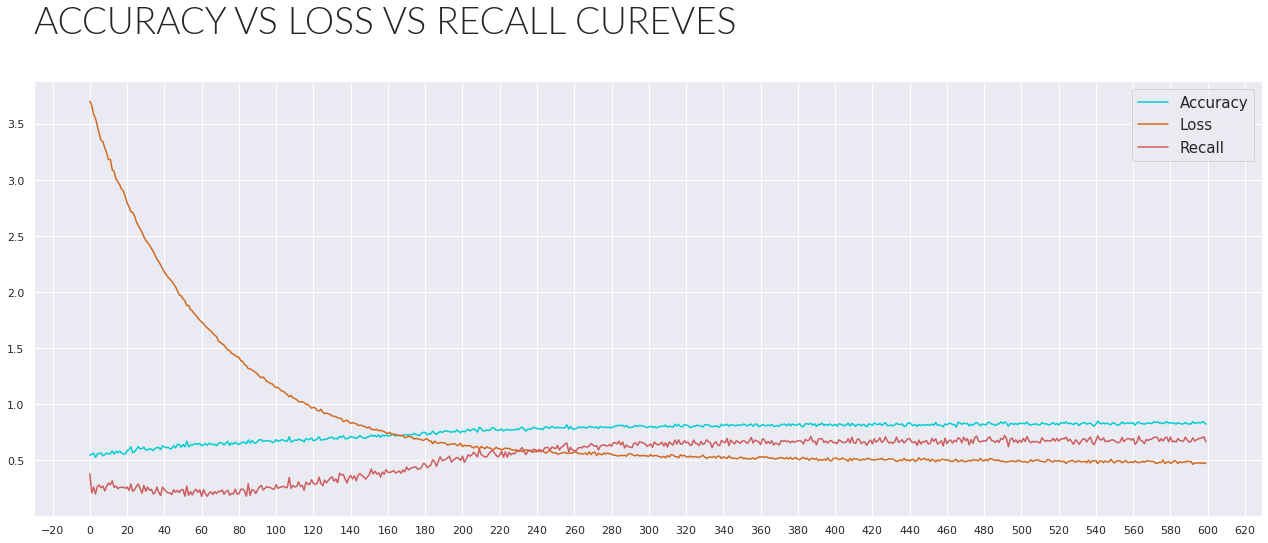

In [82]:
fig = plt.figure(figsize=(22,8))
hist = sns.lineplot(data=train_history.history['accuracy'], color="darkturquoise", label='Accuracy')
hist = sns.lineplot(data=train_history.history['loss'], color="chocolate", label='Loss')
hist = sns.lineplot(data=train_history.history['recall'], color="indianred", label='Recall')

title = fig.suptitle("ACCURACY VS LOSS VS RECALL CUREVES", x=0.125, y=1.01, ha='left',
             fontweight=100, fontfamily='Lato', size=37)

hist.xaxis.set_major_locator(ticker.MultipleLocator(20))
hist.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.legend()
plt.show()

<a id="subfil"></a>
# 9. Submission File Generation

In [83]:
y_preds = estimator.predict(X_test)
submission = pd.read_csv("../input/titanic/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = y_preds.astype(int)
submission.to_csv('submission.csv')

14/14 [==============================] - 0s 882us/step
